In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
import copy

## Data Import

In [2]:
cbsa_fpll = pd.read_csv('CBSA_fpll_tpll.csv')
cbsa_fpll = cbsa_fpll[['GTCBSA','ALL_fpll']]
cbsa_native = pd.read_csv('percent_native.csv')
cbsa_native = cbsa_native[['CBSA','native']]
cbsa_native.columns = ['GTCBSA','NATIVE']
cbsa_summary = pd.read_csv('/Users/jericho/Documents/csi/csi-research/Data/clean/cbsa/cbsa_summary.csv')
cbsa_summary = cbsa_summary[['GTCBSA', 'AVG_FAMILY_IX', 'AVG_HHFAMILY_IX', 'AVG_NHFAMILY_IX', 'AVG_FRIEND_IX', 'AVG_CCC_IX']]
cbsa_data = cbsa_fpll.merge(cbsa_native,how='left',on='GTCBSA')
cbsa_data = cbsa_data.merge(cbsa_summary,how='left',on='GTCBSA')
cbsa_pop = pd.read_csv('/Users/jericho/Documents/csi/csi-research/Data/cbsa_pop.csv')
cbsa_pop = cbsa_pop[['GTCBSA','LOG_POP']]
cbsa_data = cbsa_data.merge(cbsa_pop, how='left', on='GTCBSA')
cbsa_data = cbsa_data.sort_values('LOG_POP')
x = sorted([i%4 for i in range(len(cbsa_data))])
cbsa_data['POP_BIN'] = x
cbsa_data
cbsa_data.index = cbsa_data['GTCBSA']

#cbsa_data = cbsa_data[['ALL_fpll', 'NATIVE', 'AVG_FAMILY_IX', 'AVG_HHFAMILY_IX','AVG_NHFAMILY_IX', 'AVG_FRIEND_IX', 'AVG_CCC_IX']]
cbsa_data = cbsa_data[['ALL_fpll', 'NATIVE', 'AVG_FRIEND_IX', 'POP_BIN']]
cbsa_data



ALL_fpll    NATIVE  AVG_FRIEND_IX  POP_BIN
GTCBSA                                            
38220   0.193720  0.791032           0.10        0
30340   0.395245  0.757601           0.31        0
15680   0.098700  0.508913           0.16        0
48060   0.101828  0.658873           0.14        0
48700   0.309311  0.852335           0.25        0
...          ...       ...            ...      ...
26420   0.181739  0.547627           0.18        3
19100   0.199925  0.550290           0.18        3
16980   0.172188  0.630149           0.20        3
31080   0.152585  0.506947           0.22        3
35620   0.167588  0.546488           0.19        3

[258 rows x 4 columns]

In [3]:
stringency = pd.read_csv('stringency.csv')
stringency

GTCBSA     Pop  1/1/20  1/2/20  1/3/20  1/4/20  1/5/20  1/6/20  1/7/20  \
0    10100.0   42824    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
1    10140.0   72779    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
2    10180.0  170669    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
3    10220.0   38355    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
4    10300.0   98381    1.39    1.39    1.39    1.39    1.39    1.39    1.39   
..       ...     ...     ...     ...     ...     ...     ...     ...     ...   
912  49660.0  541846    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
913  49700.0  172469    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
914  49740.0  209468    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
915  49780.0   86131    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
916  49820.0   14304    0.00    0.00    0.00    0.00    0.00    0.00    0.00   

     1/8/20  ...    4/19/21    4/20/21    4/21/21    4/22/21    4/23/21  \
0      0.00  ...  37.960000  37.960000  37.960000  37.960000  37.960000   
1      0.00  ...  61.110000  61.110000  61.110000  61.110000  61.110000   
2      0.00  ...  47.690000  47.690000  47.690000  52.310000  52.310000   
3      0.00  ...  46.300000  46.300000  46.300000  46.300000  46.300000   
4      1.39  ...  54.630000  54.630000  54.630000  54.630000  54.630000   
..      ...  ...        ...        ...        ...        ...        ...   
912    0.00  ...  48.641379  48.641379  48.641379  48.641379  40.448033   
913    0.00  ...  56.940000  56.940000  56.940000  51.390000  51.390000   
914    0.00  ...  40.280000  40.280000  40.280000  40.280000  40.280000   
915    0.00  ...  50.930000  50.930000  50.930000  50.930000  50.930000   
916    0.00  ...  47.690000  47.690000  47.690000  52.310000  52.310000   

       4/24/21    4/25/21    4/26/21  4/27/21  4/28/21  
0    37.960000  37.960000   0.000000     0.00      0.0  
1    61.110000  61.110000  61.110000    61.11      0.0  
2    52.310000  52.310000  52.310000     0.00      0.0  
3    46.300000  46.300000  46.300000     0.00      0.0  
4    54.630000  54.630000  54.630000     0.00      0.0  
..         ...        ...        ...      ...      ...  
912  40.448033  40.448033  40.448033     0.00      0.0  
913  51.390000  54.170000   0.000000     0.00      0.0  
914  40.280000  40.280000  40.280000     0.00      0.0  
915  50.930000  50.930000  50.930000     0.00      0.0  
916  52.310000  52.310000  52.310000     0.00      0.0  

[917 rows x 486 columns]

## Initial EDA

In [4]:
# cbsa_data['f_f/f_o'] = cbsa_data['ALL_fpll'] / cbsa_data['AVG_FRIEND_IX']
# cbsa_data['n/f_o'] = cbsa_data['NATIVE'] / cbsa_data['AVG_FRIEND_IX']
# cbsa_data['log_(f_f/f_o)'] = cbsa_data['f_f/f_o'].apply(lambda x: math.log(x) if x != 0 else 0)
# cbsa_data['log_(n/f_o)'] = cbsa_data['n/f_o'].apply(lambda x: math.log(x) if x != 0 else 0)

# colors = ['tab:blue','tab:green','tab:orange','tab:red']
# plt.scatter(cbsa_data['log_(f_f/f_o)'], cbsa_data['log_(n/f_o)'],c=[colors[i] for i in cbsa_data['POP_BIN'].tolist()],alpha = 0.3)
# plt.show()

In [5]:
# edge, bin = [], []

# cbsa_data['average'] = (cbsa_data['log_(f_f/f_o)'] + cbsa_data['log_(n/f_o)']) / 2
# cbsa_data = cbsa_data.sort_values('average')

# for bin in cbsa_data.POP_BIN.unique():
#    tdf = cbsa_data[cbsa_data.POP_BIN == bin]
#    cbsas = tdf.index.tolist()
#    edge += [cbsas[0],cbsas[-1]]
#    bin += [2,2]


# plt.scatter(cbsa_data['log_(f_f/f_o)'], cbsa_data['log_(n/f_o)'],c=[colors[i] for i in cbsa_data['POP_BIN'].tolist()],alpha = 0.3)

# subset_df = cbsa_data[cbsa_data.index.isin(edge)]


# plt.scatter(subset_df['log_(f_f/f_o)'], subset_df['log_(n/f_o)'],c=[colors[i] for i in subset_df['POP_BIN'].tolist()],alpha = 0.7,s=70)
# plt.show()

# display(subset_df.sort_values('POP_BIN'))

In [6]:
# # 35620  nyc
# # 47900  dc
# # 26420  houson
# # 19100  dallas
# import copy
# copy_df = copy.deepcopy(cbsa_data.loc[[47900,19100]])
# copy_df = copy_df[['POP_BIN']]
# copy_df['POP_BIN'] = ['*', '*']

# test_df = pd.concat([subset_df.sort_values('POP_BIN'), copy_df])
# test_df[['POP_BIN']]

In [7]:
cbsa_data

ALL_fpll    NATIVE  AVG_FRIEND_IX  POP_BIN
GTCBSA                                            
38220   0.193720  0.791032           0.10        0
30340   0.395245  0.757601           0.31        0
15680   0.098700  0.508913           0.16        0
48060   0.101828  0.658873           0.14        0
48700   0.309311  0.852335           0.25        0
...          ...       ...            ...      ...
26420   0.181739  0.547627           0.18        3
19100   0.199925  0.550290           0.18        3
16980   0.172188  0.630149           0.20        3
31080   0.152585  0.506947           0.22        3
35620   0.167588  0.546488           0.19        3

[258 rows x 4 columns]

In [8]:
# pd.plotting.scatter_matrix(cbsa_data, figsize=(12,8))
# plt.show()

In [9]:
# vars = ['ALL_fpll', 'NATIVE', 'AVG_FRIEND_IX']
# for i in range(3):
#     for j in range(i,3):
#         print(vars[i], vars[j])
#         rho = stats.pearsonr(cbsa_data[vars[i]], cbsa_data[vars[j]])
#         print(rho)
#         print()

In [10]:
# cbsa_data['metric'] = (2 * cbsa_data['ALL_fpll'] + cbsa_data['NATIVE']) * (1 / (cbsa_data['AVG_FRIEND_IX'] + 1))
# cbsa_data = cbsa_data.sort_values('metric')
# cbsa_data

## Scatterplots

In [11]:
cbsa_states = pd.read_csv('/Users/jericho/Documents/csi/csi-research/Data/cbsa-county-crosswalk.csv')
cbsa_states = cbsa_states[['CBSA Code','FIPS State Code']]
cbsa_states = cbsa_states.drop_duplicates()
cbsa_states = cbsa_states.groupby('CBSA Code').count()
cbsa_states = cbsa_states.reset_index()
cbsa_states.columns = ['GTCBSA','state_count']
cbsa_states

GTCBSA  state_count
0     10100            1
1     10140            1
2     10180            1
3     10220            1
4     10260            1
..      ...          ...
924   49660            2
925   49700            1
926   49740            1
927   49780            1
928   49820            1

[929 rows x 2 columns]

In [12]:
cbsa_df = pd.read_csv('cbsa_various_metrics.csv')
cbsa_df = pd.read_csv('cbsa_various_metrics_v2.csv')

cbsa_df = cbsa_df.merge(cbsa_states, how='left', on='GTCBSA')
cbsa_df = cbsa_df[cbsa_df['state_count']==1]
temp_df = copy.deepcopy(cbsa_df[['GTCBSA','ALL_fpll','K1_cases','K1_deaths','K2_cases','K2_deaths','K3_cases', 'K3_deaths','CBSA_c2_workplace_closing','CBSA_c6_stay_at_home_requirements','CBSA_c1_school_closing', 'CBSA_h6_facial_coverings']])
temp_df = temp_df[temp_df['ALL_fpll']>0]
temp_df = temp_df[temp_df['K2_cases']>0]
print(temp_df.shape)

(184, 12)


In [13]:
cbsa_df = pd.read_csv('cbsa_various_metrics.csv')
cbsa_df = pd.read_csv('cbsa_various_metrics_v2.csv')

# cbsa_df = cbsa_df.merge(cbsa_states, how='left', on='GTCBSA')
# cbsa_df = cbsa_df[cbsa_df['state_count']==1]
# display(cbsa_df.head())

n_bins = 3
var = 'K3_cases'

# temp_df = copy.copy(cbsa_df[['GTCBSA','ALL_fpll','K1_cases','K1_deaths','K2_cases','K2_deaths','K3_cases', 'K3_deaths','workplace_close_H','stay_at_home_H','school_closing_H']])
# temp_df = temp_df[temp_df['ALL_fpll']>0]
# temp_df = temp_df[temp_df[var]>0]
# temp_vec = sorted([i%n_bins for i in range(len(temp_df))])
# temp_df = temp_df.sort_values('stay_at_home_H')
# temp_df['stay_at_home_bin'] = temp_vec
# temp_df = temp_df.sort_values('school_closing_H')
# temp_df['school_closing_bin'] = temp_vec
# temp_df = temp_df.sort_values('workplace_close_H')
# temp_df['workplace_closing_bin'] = temp_vec


temp_df = copy.copy(cbsa_df[['GTCBSA','ALL_fpll','K1_cases','K1_deaths','K2_cases','K2_deaths','K3_cases', 'K3_deaths','CBSA_c2_workplace_closing','CBSA_c6_stay_at_home_requirements','CBSA_c1_school_closing', 'CBSA_h6_facial_coverings']])
temp_df = temp_df[temp_df['ALL_fpll']>0]
temp_df = temp_df[temp_df[var]>0]
temp_vec = sorted([i%n_bins for i in range(len(temp_df))])
temp_df = temp_df.sort_values('CBSA_c6_stay_at_home_requirements')
temp_df['stay_at_home_bin'] = temp_vec
temp_df = temp_df.sort_values('CBSA_c1_school_closing')
temp_df['school_closing_bin'] = temp_vec
temp_df = temp_df.sort_values('CBSA_c2_workplace_closing')
temp_df['workplace_closing_bin'] = temp_vec


def condition(df):
    return 1 if df['workplace_closing_bin'] == df['school_closing_bin'] else 0

temp_df['dual_stringency'] = temp_df.apply(lambda x: condition(x), axis=1)

temp_df_b0 = copy.deepcopy(temp_df[temp_df['stay_at_home_bin']==0].sort_values('ALL_fpll'))
temp_df_b1 = copy.deepcopy(temp_df[temp_df['stay_at_home_bin']==1].sort_values('ALL_fpll'))
temp_df_b2 = copy.deepcopy(temp_df[temp_df['stay_at_home_bin']==2].sort_values('ALL_fpll'))

temp_df = temp_df[temp_df['dual_stringency']==1]
# display(temp_df.sort_values('ALL_fpll').head())
# display(temp_df[temp_df['stay_at_home_bin']==0].sort_values('ALL_fpll').head())
# display(temp_df[temp_df['stay_at_home_bin']==1].sort_values('ALL_fpll').head())
# display(temp_df[temp_df['stay_at_home_bin']==2].sort_values('ALL_fpll').head())

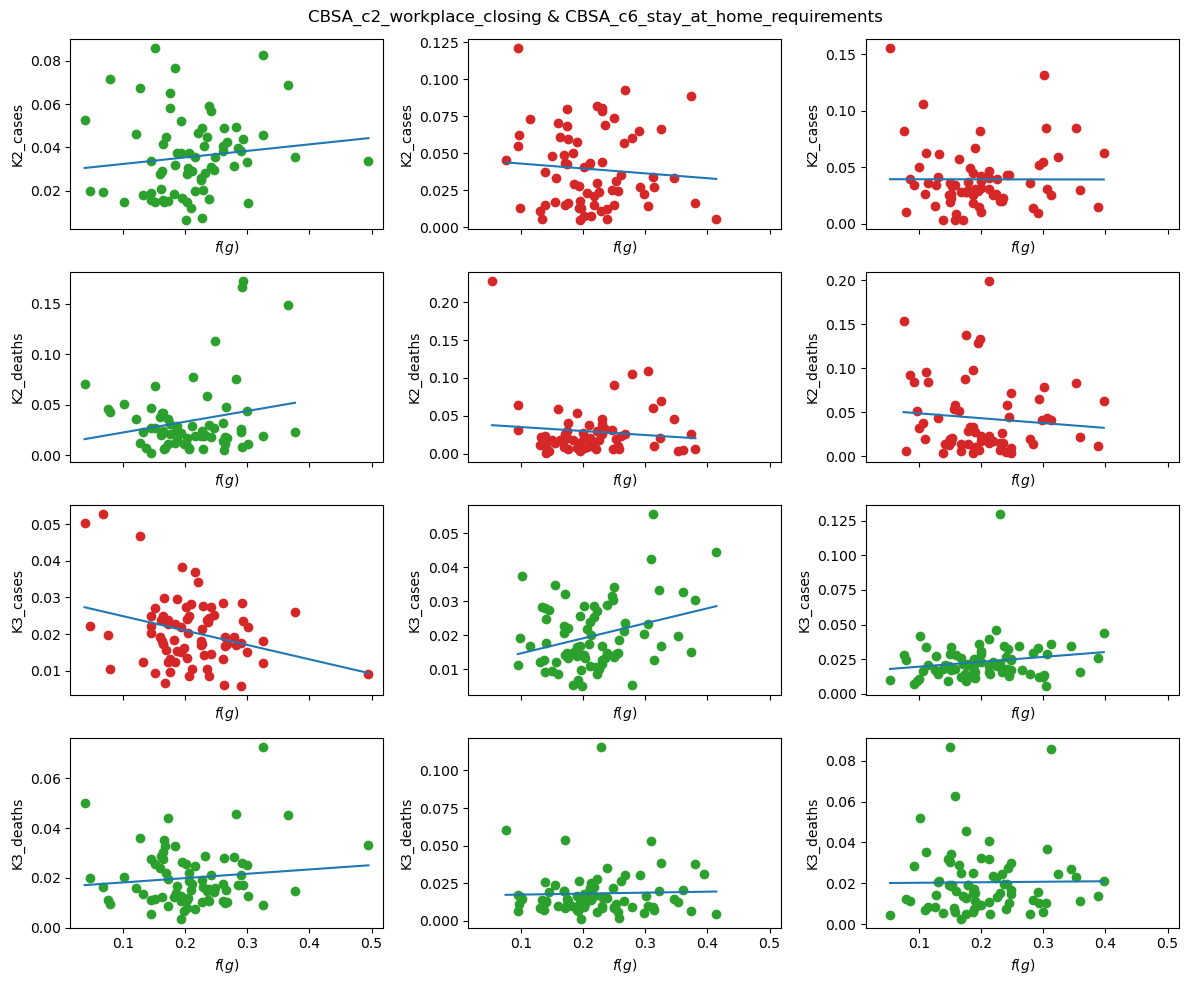

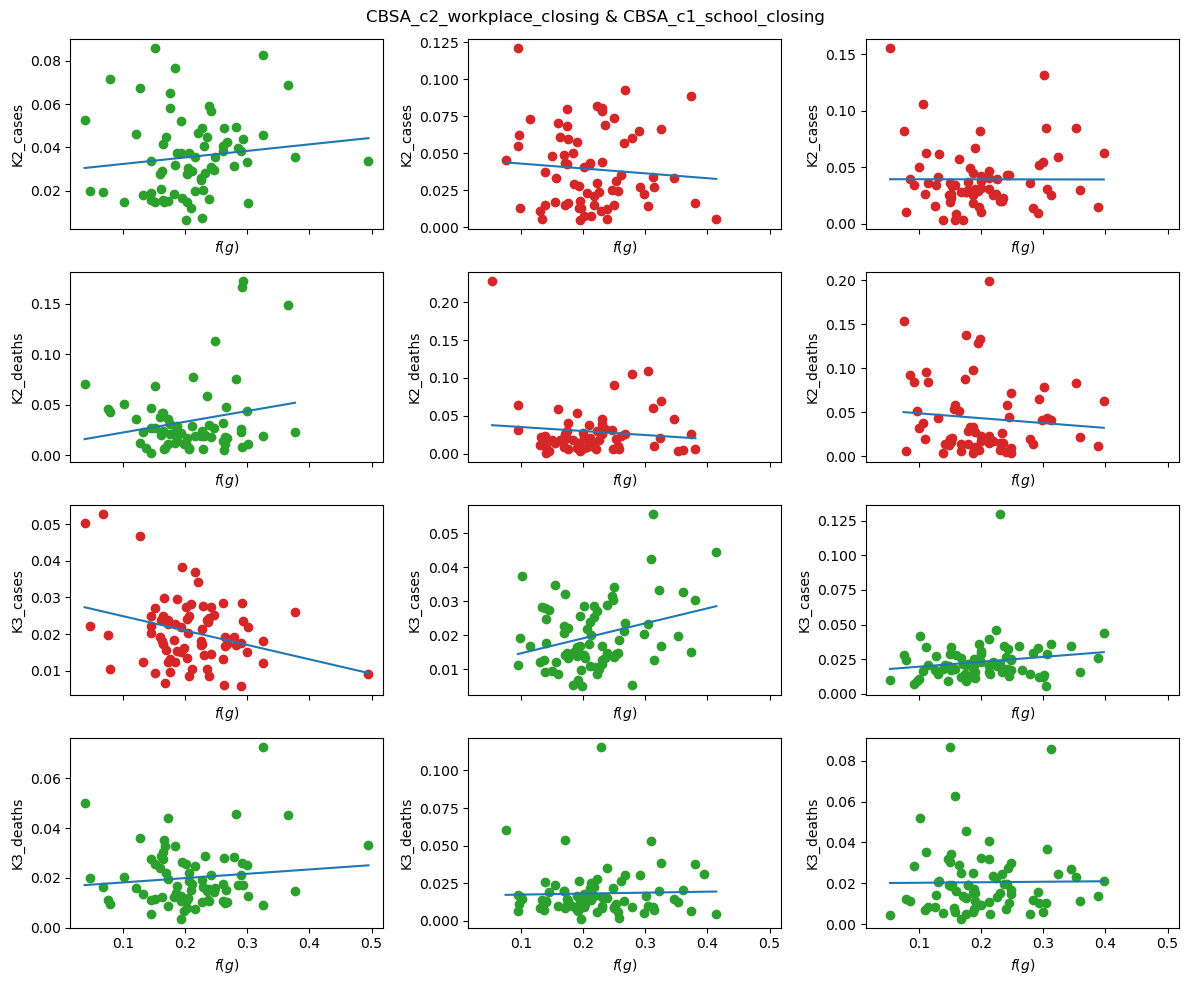

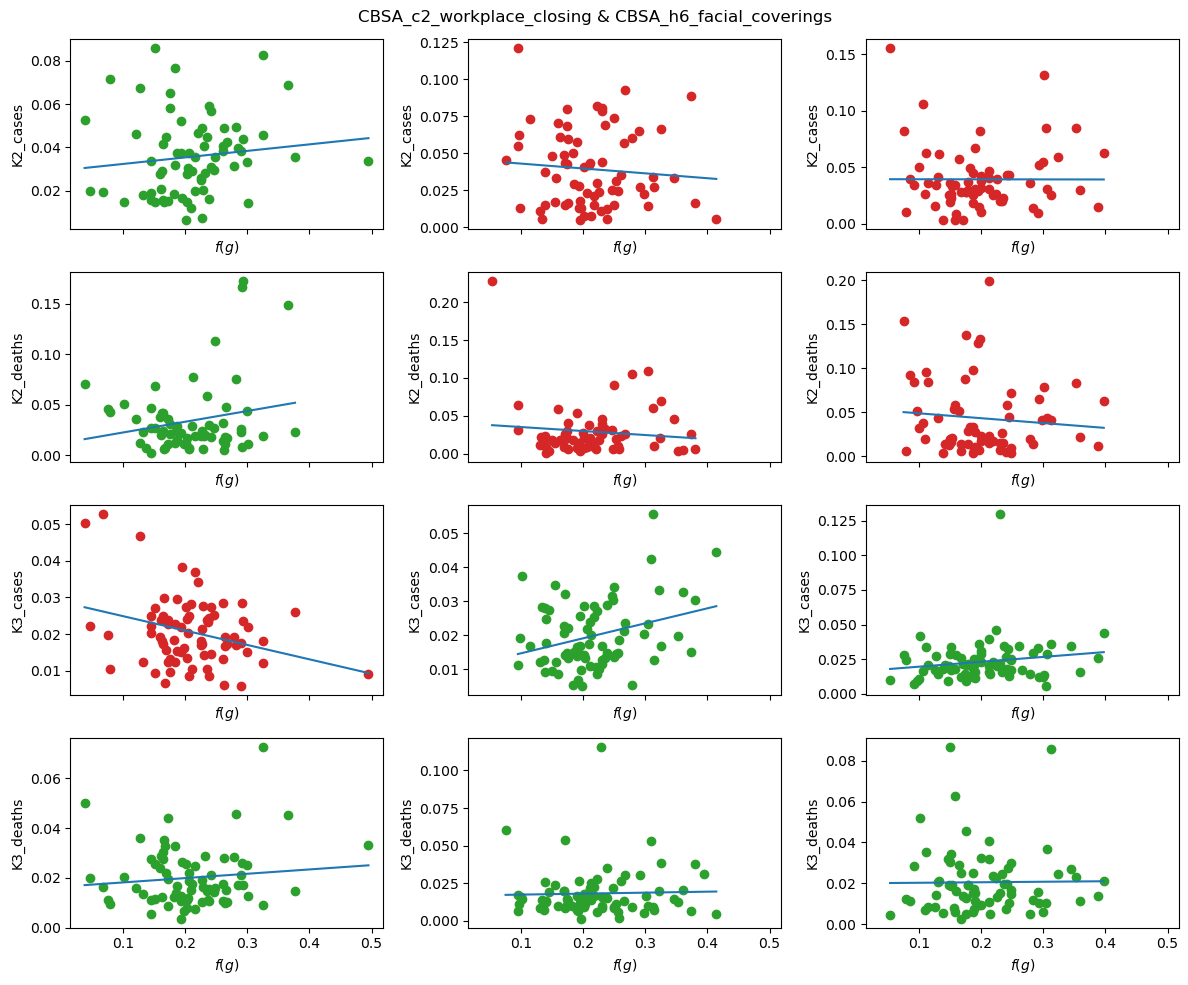

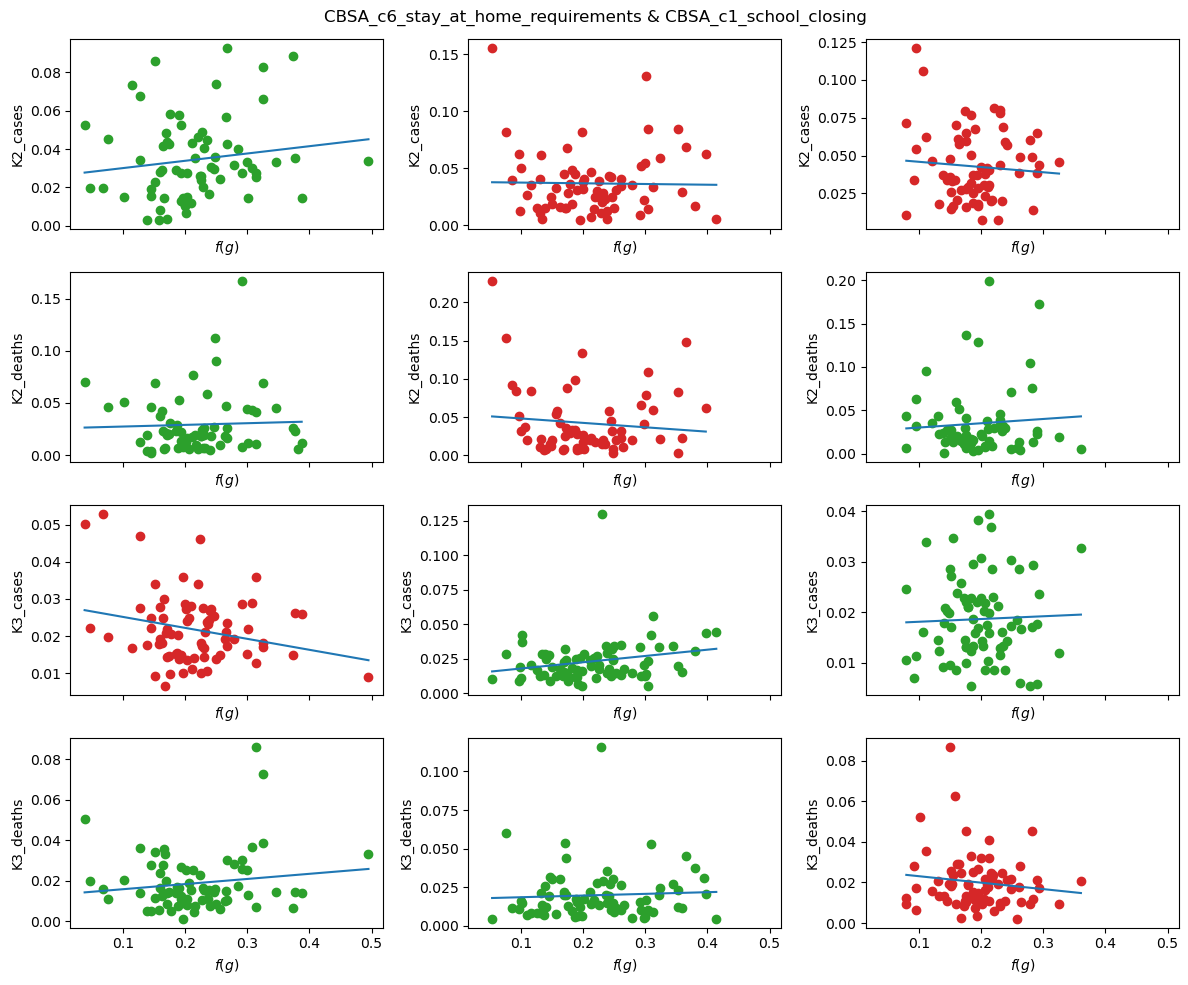

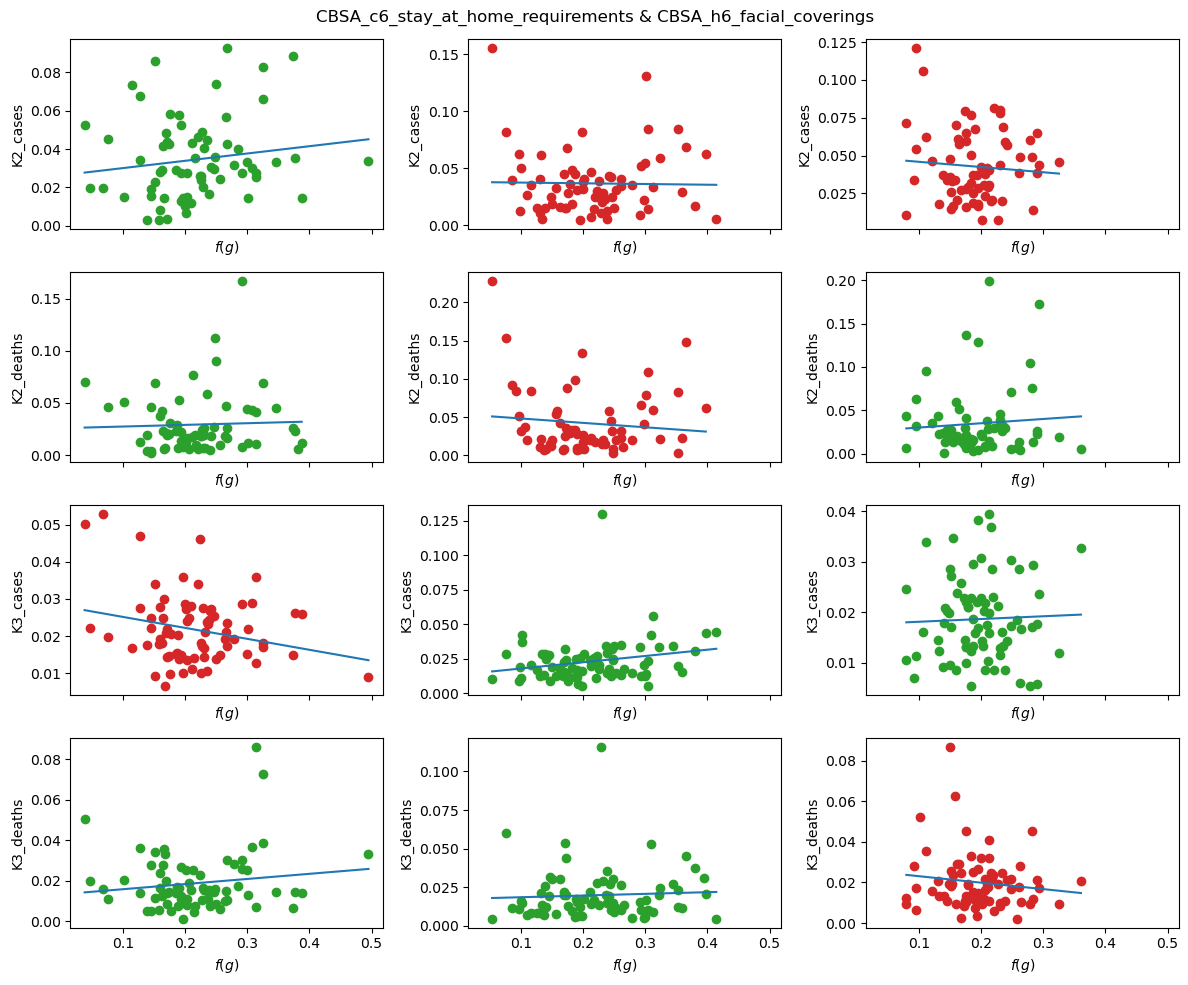

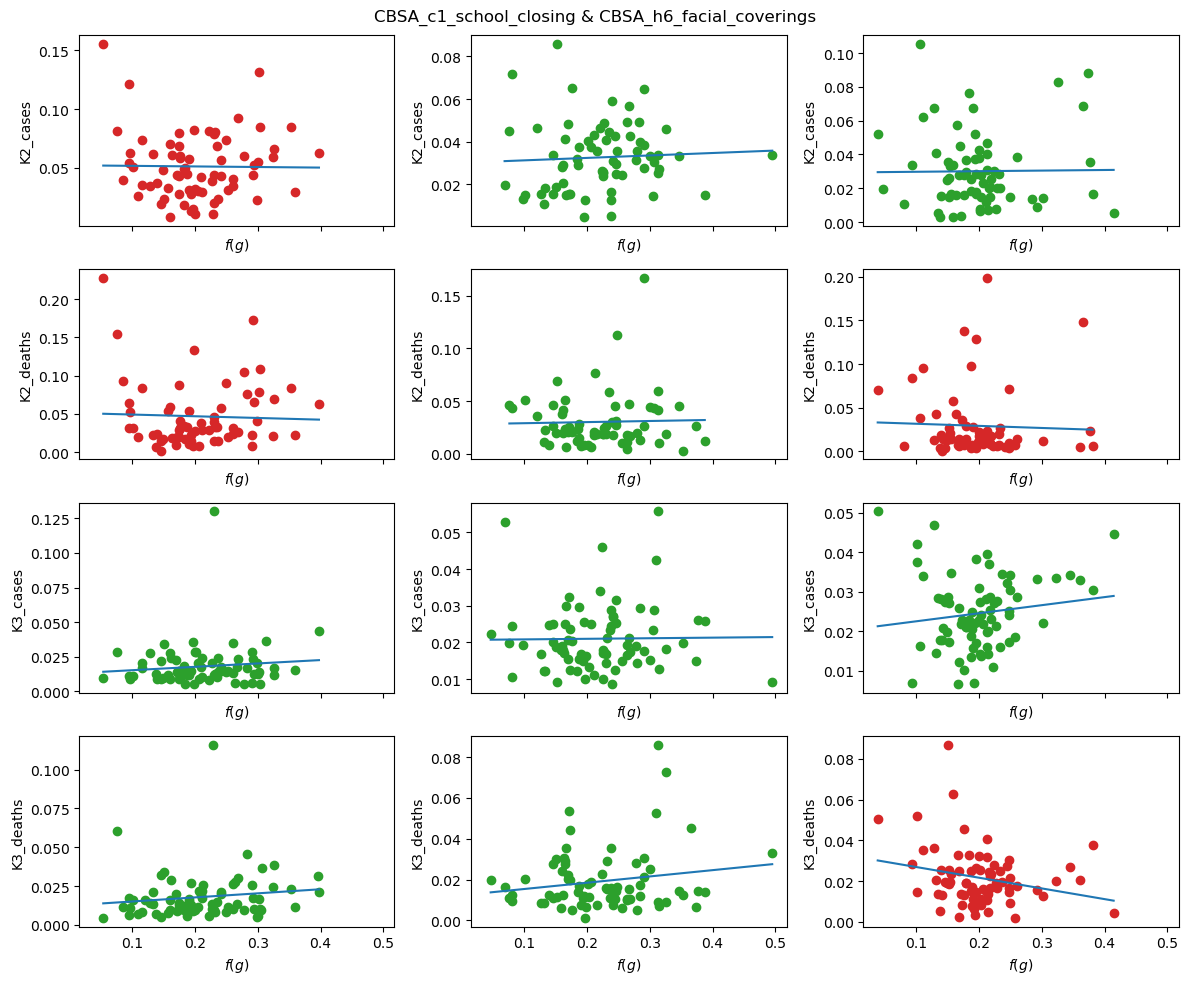

In [14]:
selection_metrics = ['CBSA_c2_workplace_closing','CBSA_c6_stay_at_home_requirements','CBSA_c1_school_closing', 'CBSA_h6_facial_coverings']
var_list = ['K2_cases','K2_deaths','K3_cases', 'K3_deaths']

def condition(df,a,b):
    return 1 if df[b] == df[b] else 0

def stringency_bin_f_k_plotter(ax,df,var,metric_a,metric_b, bin):
    m,b = np.polyfit(df['ALL_fpll'], df[var], 1)
    if m > 0:
        c='tab:green'
    else:
        c='tab:red'
    ax.scatter(df['ALL_fpll'], df[var],c=c)
    ax.plot(df['ALL_fpll'], df['ALL_fpll']*m+b)
    ax.set_xlabel('$f(g)$')
    ax.set_ylabel(var)
    #ax.title(metric_a +' '+metric_b + ' ' + bin)


for i in range(len(selection_metrics)-1):
    for j in range(i+1,len(selection_metrics)):
        fig, axes = plt.subplots(4,3, figsize=(12,10), sharex=True)
        metric_a = selection_metrics[i]
        metric_b = selection_metrics[j]
        for var_idx in range(len(var_list)):
            temp_df = copy.deepcopy(cbsa_df[['GTCBSA','ALL_fpll',var_list[var_idx], metric_a, metric_b]])
            temp_df = temp_df[temp_df['ALL_fpll']>0]
            temp_df = temp_df[temp_df[var_list[var_idx]]>0]
            temp_vec = sorted([i%n_bins for i in range(len(temp_df))])
            for k in [metric_a,metric_b]:
                temp_df = temp_df.sort_values(k)
                temp_df[k+'_bin'] = temp_vec
            temp_df['dual_stringency'] = temp_df.apply(lambda x: condition(x,metric_a,metric_b), axis=1)
            #display(temp_df)
            temp_df_b0 = copy.deepcopy(temp_df[temp_df[metric_a+'_bin']==0].sort_values('ALL_fpll'))
            temp_df_b1 = copy.deepcopy(temp_df[temp_df[metric_a+'_bin']==1].sort_values('ALL_fpll'))
            temp_df_b2 = copy.deepcopy(temp_df[temp_df[metric_a+'_bin']==2].sort_values('ALL_fpll'))
            #display(temp_df_b1)
            stringency_bin_f_k_plotter(axes[var_idx,0], temp_df_b0,var_list[var_idx],metric_a,metric_b, 'bin_low')
            stringency_bin_f_k_plotter(axes[var_idx,1], temp_df_b1,var_list[var_idx],metric_a,metric_b, 'bin_mid')
            stringency_bin_f_k_plotter(axes[var_idx,2], temp_df_b2,var_list[var_idx],metric_a,metric_b, 'bin_high')
        plt.suptitle(metric_a+' & '+metric_b)
        plt.tight_layout()
        

## Lineplots

CBSA_c2_workplace_closing CBSA_c6_stay_at_home_requirements
CBSA_c2_workplace_closing CBSA_c1_school_closing
CBSA_c2_workplace_closing CBSA_h6_facial_coverings
CBSA_c6_stay_at_home_requirements CBSA_c1_school_closing
CBSA_c6_stay_at_home_requirements CBSA_h6_facial_coverings
CBSA_c1_school_closing CBSA_h6_facial_coverings


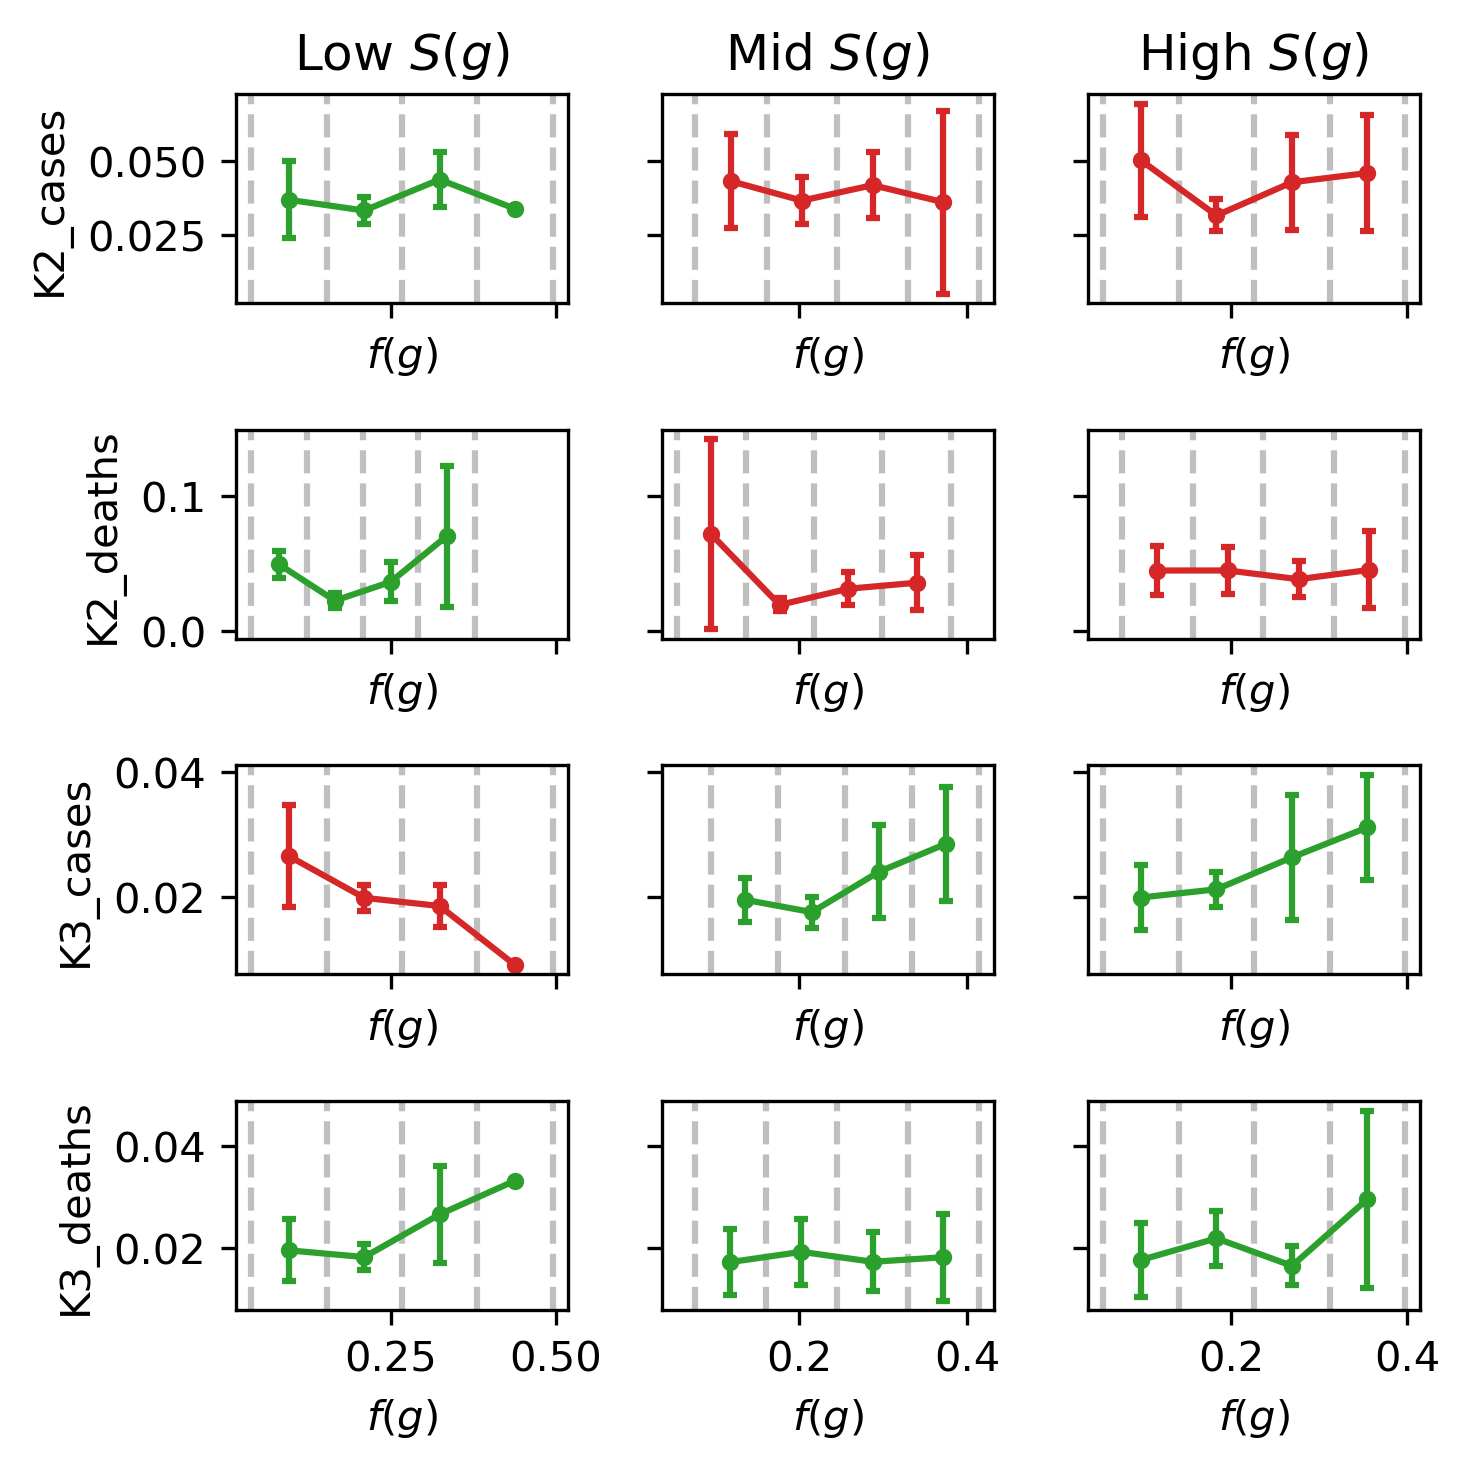

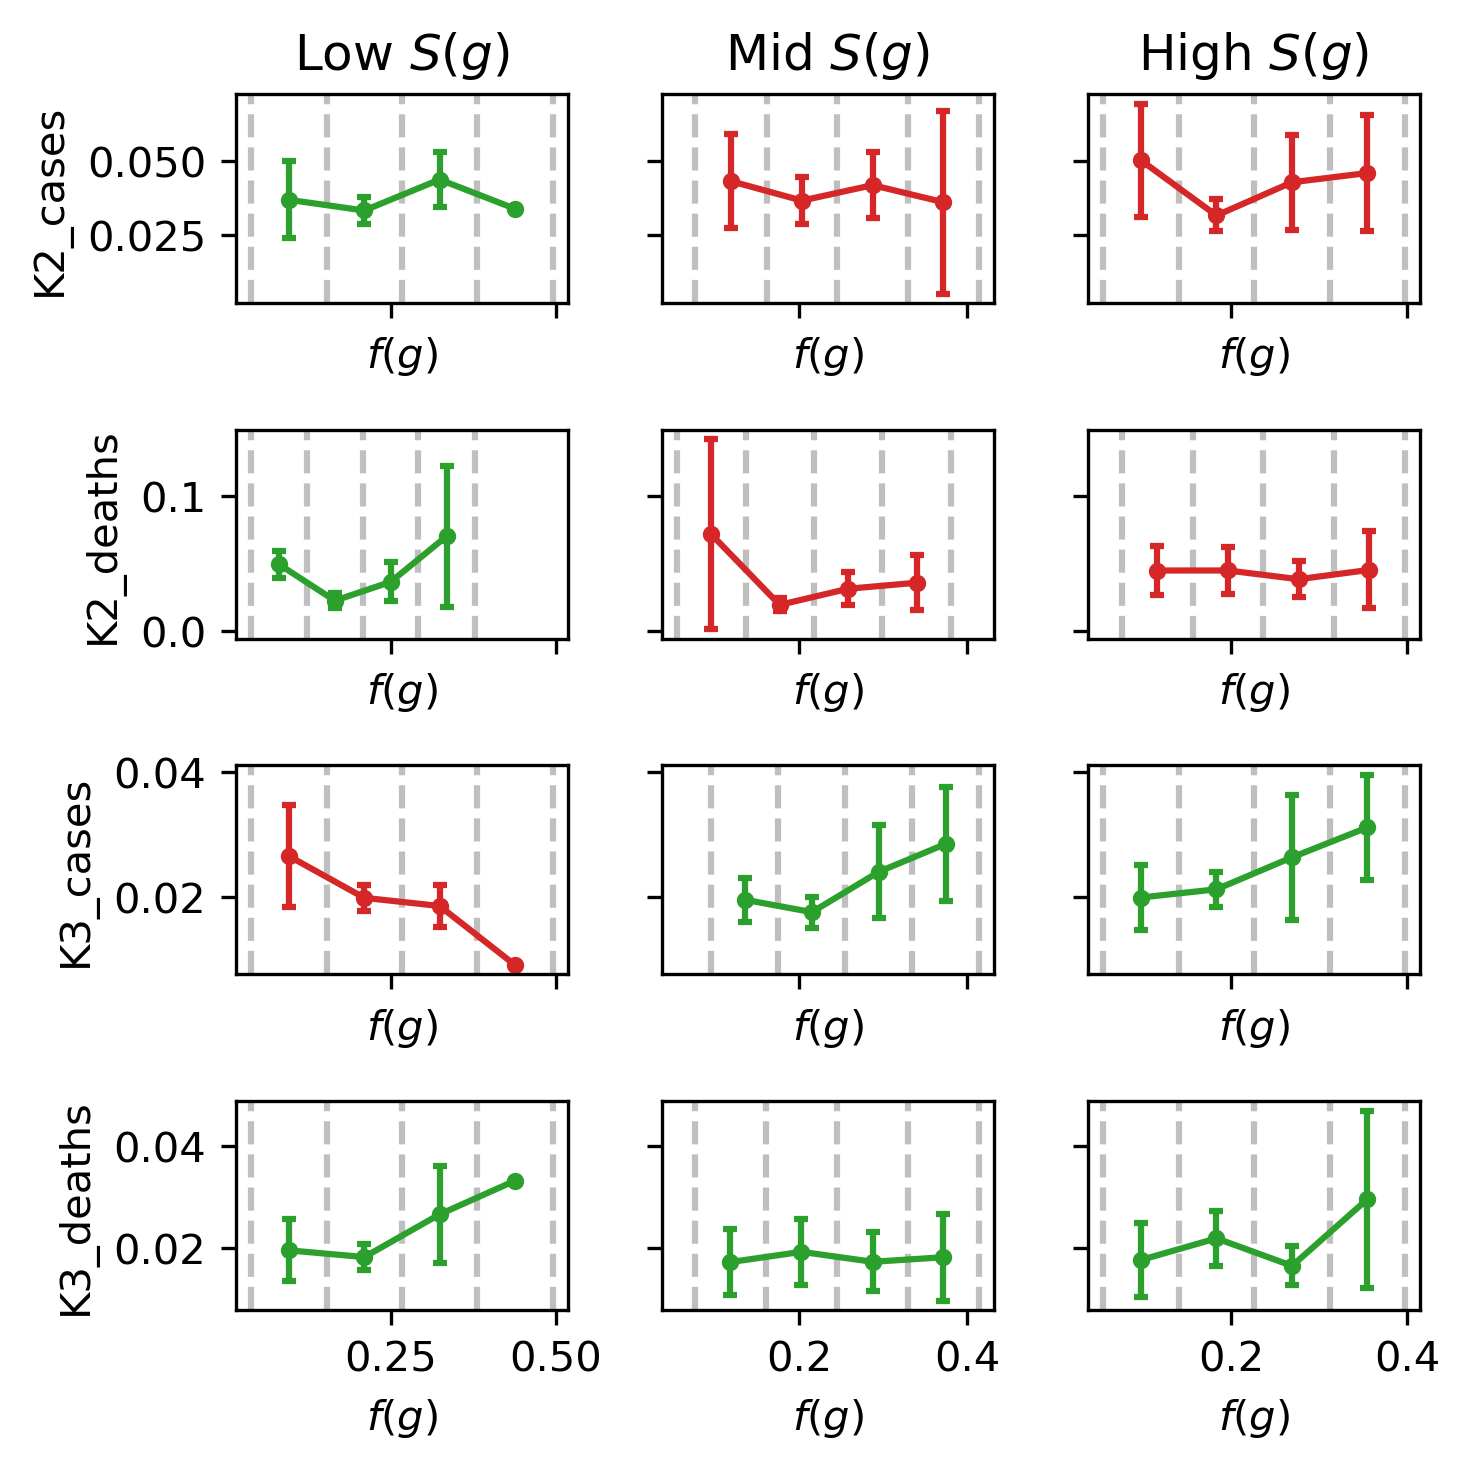

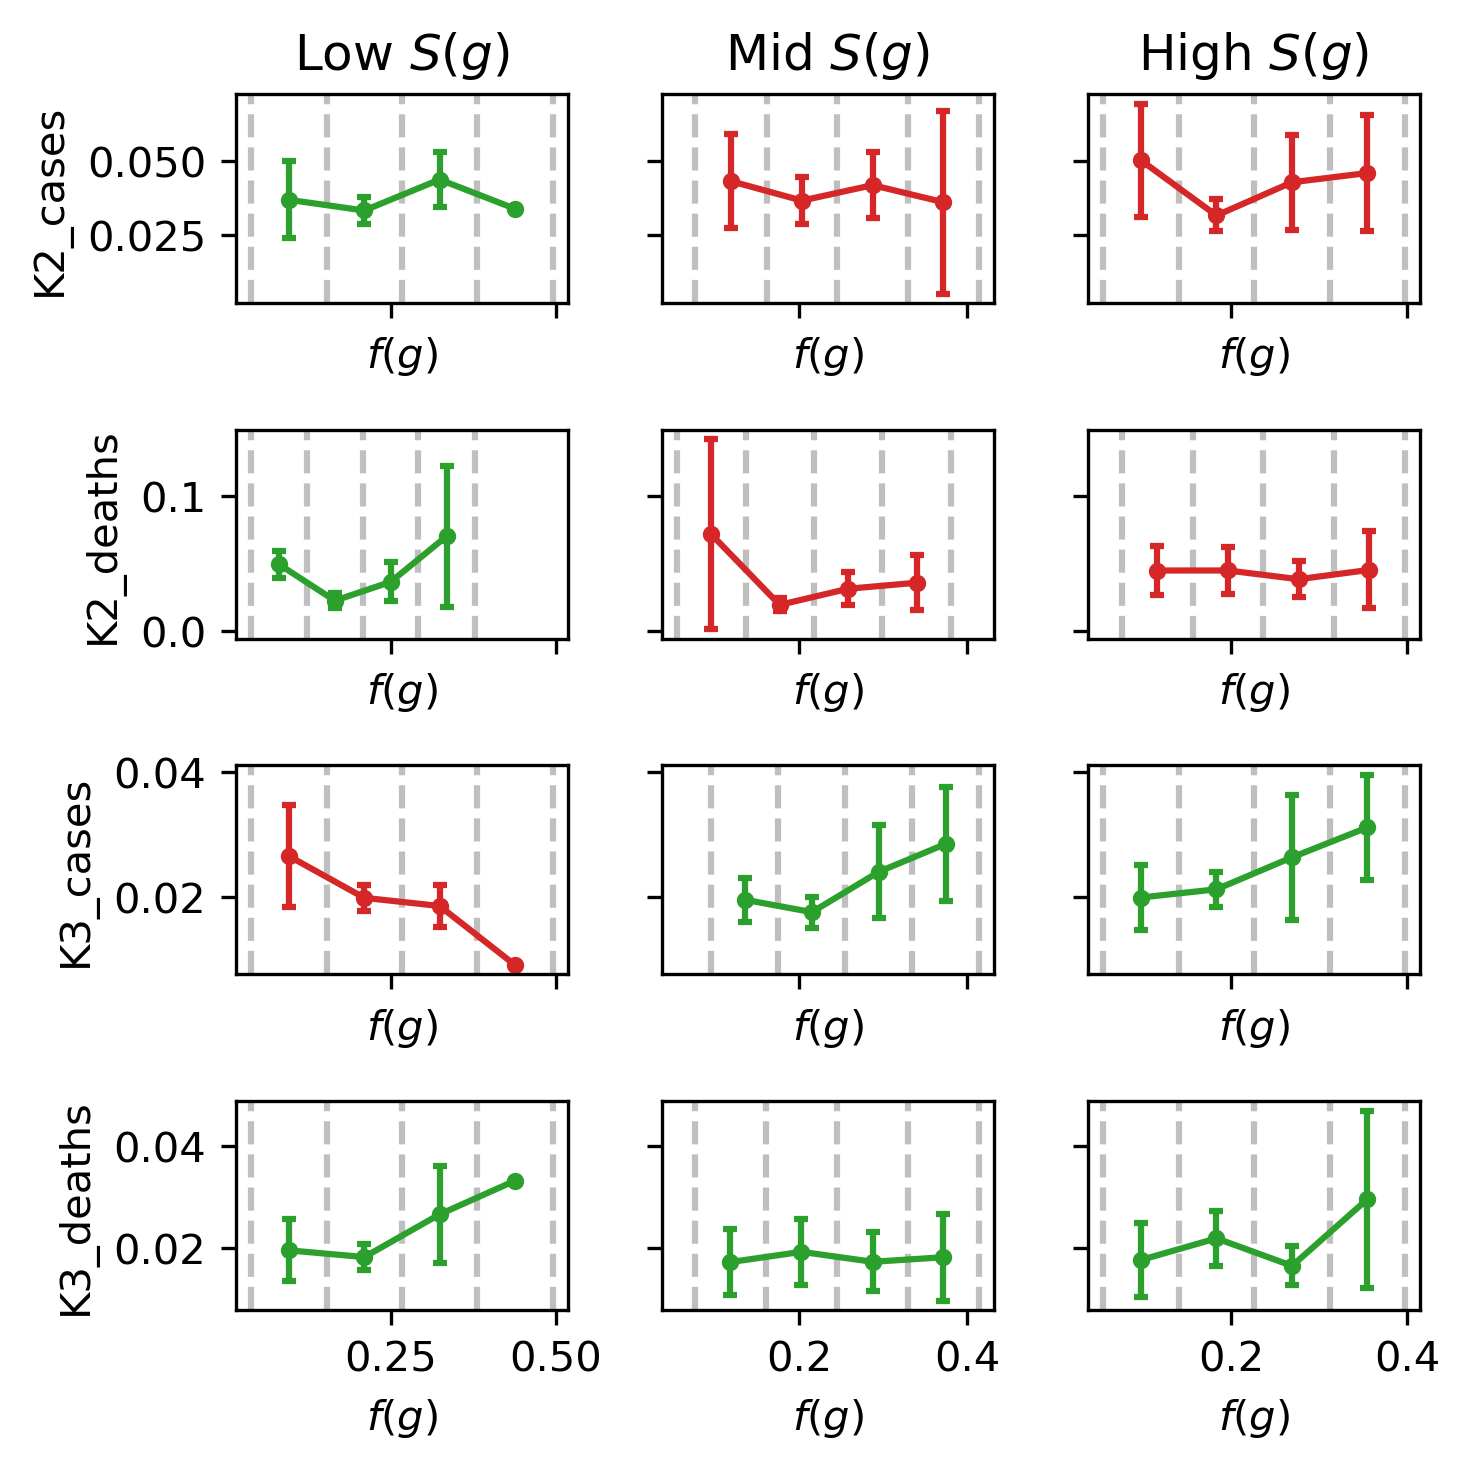

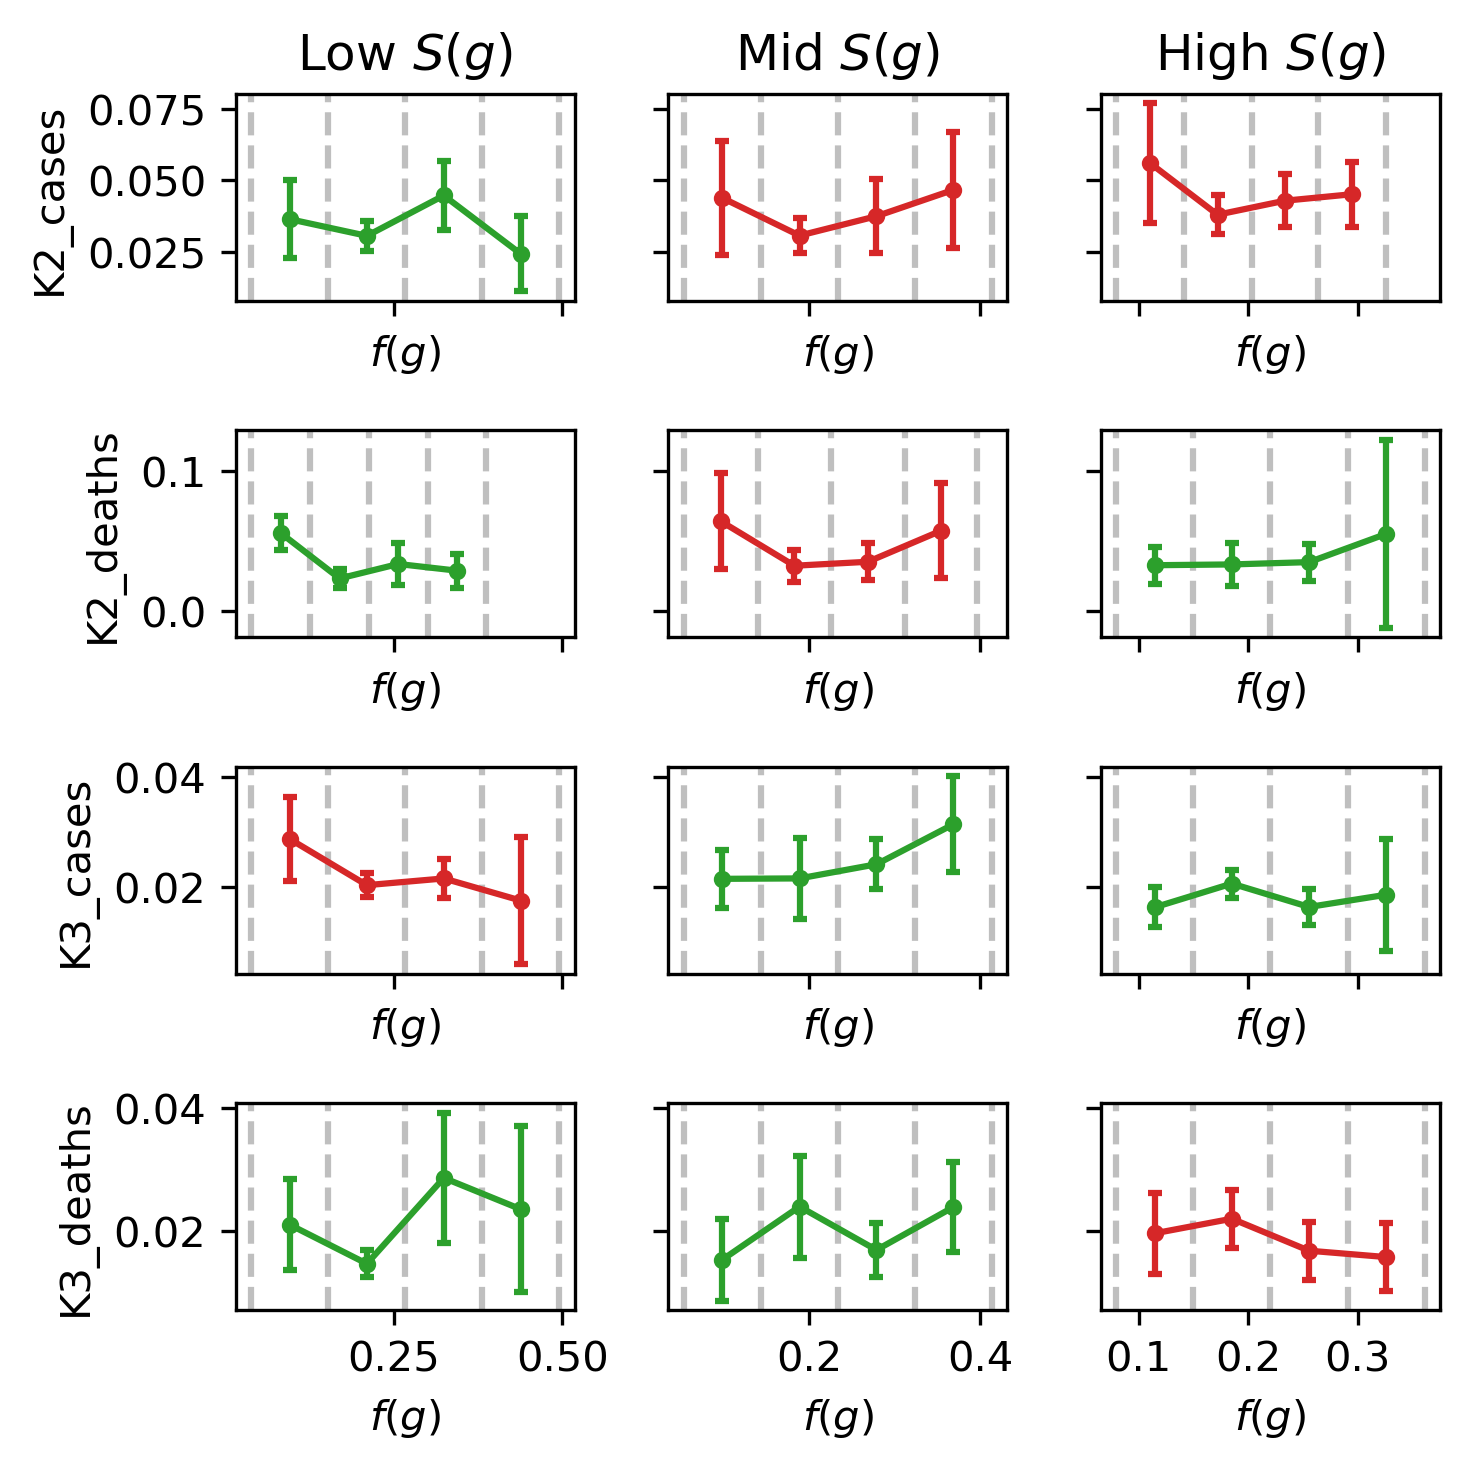

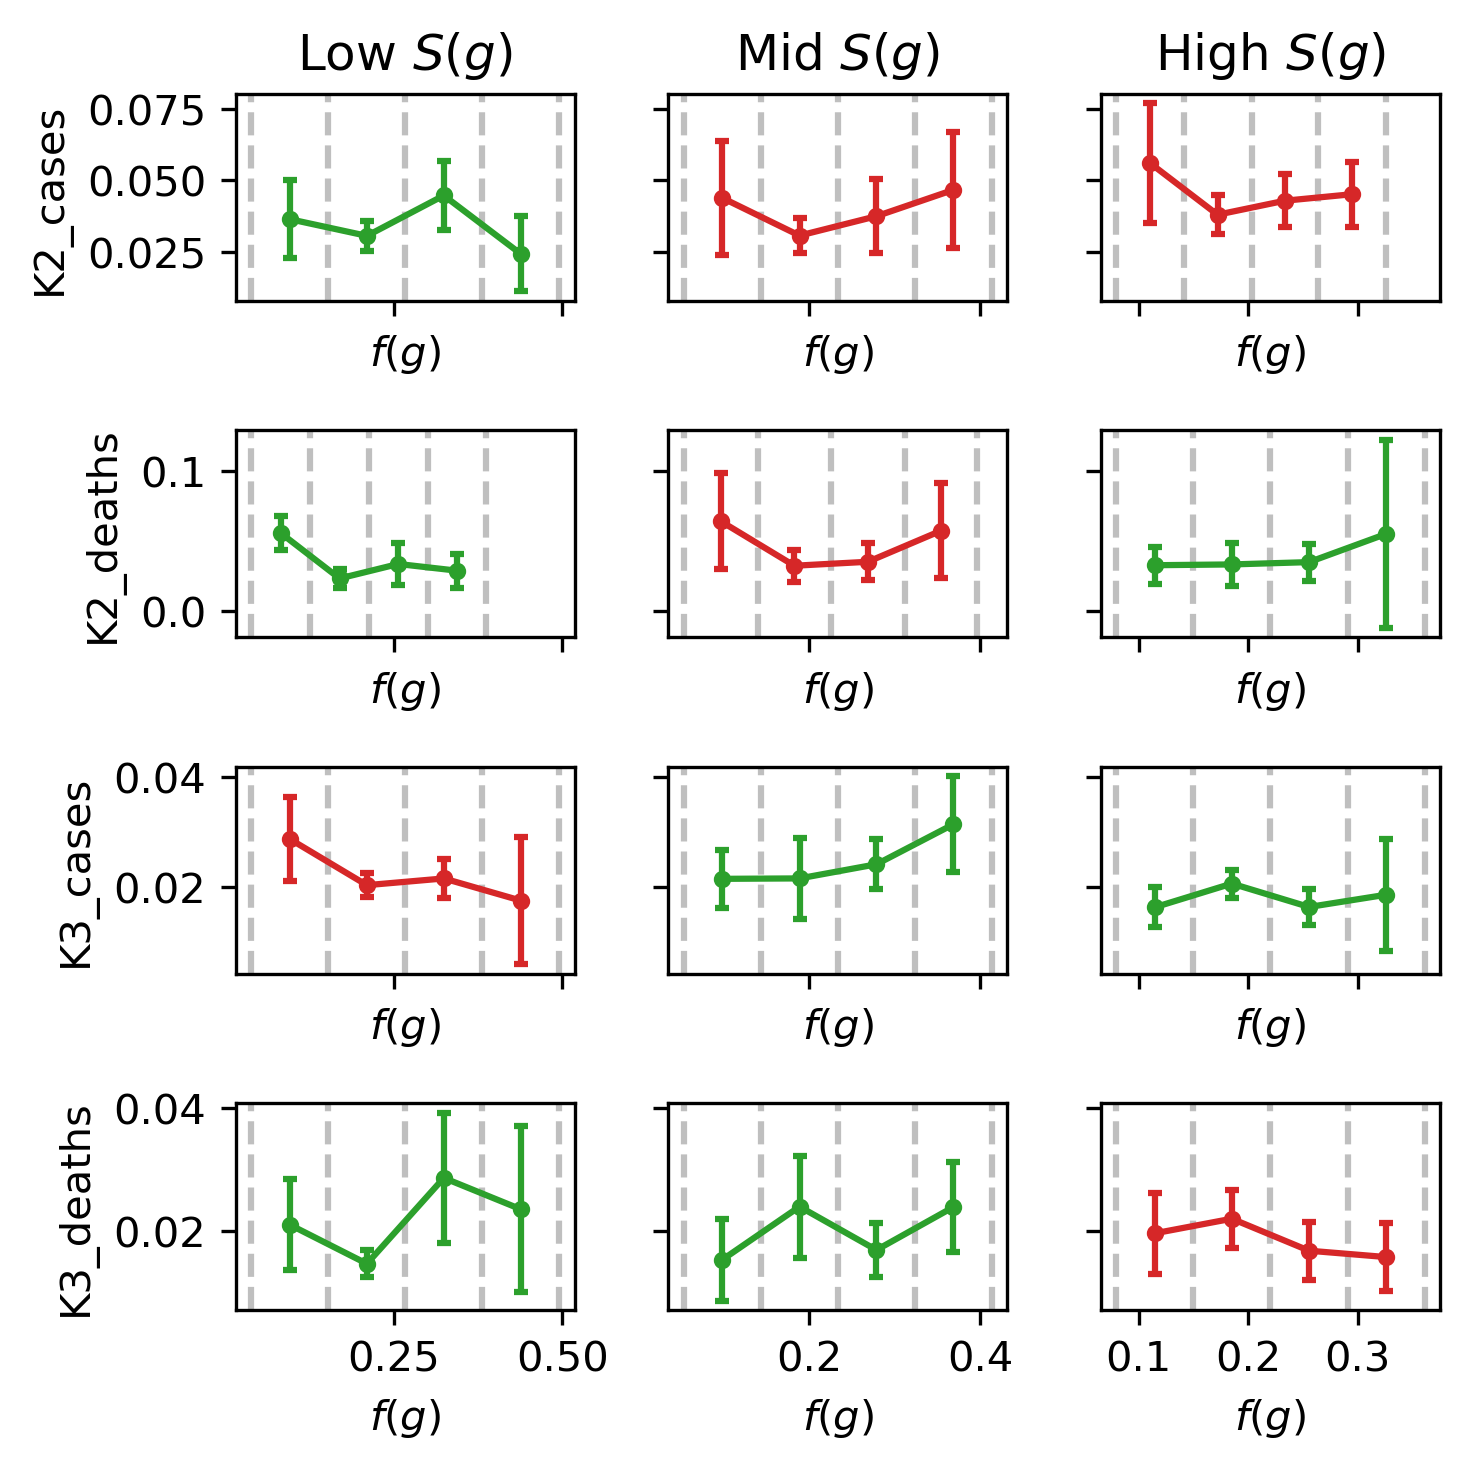

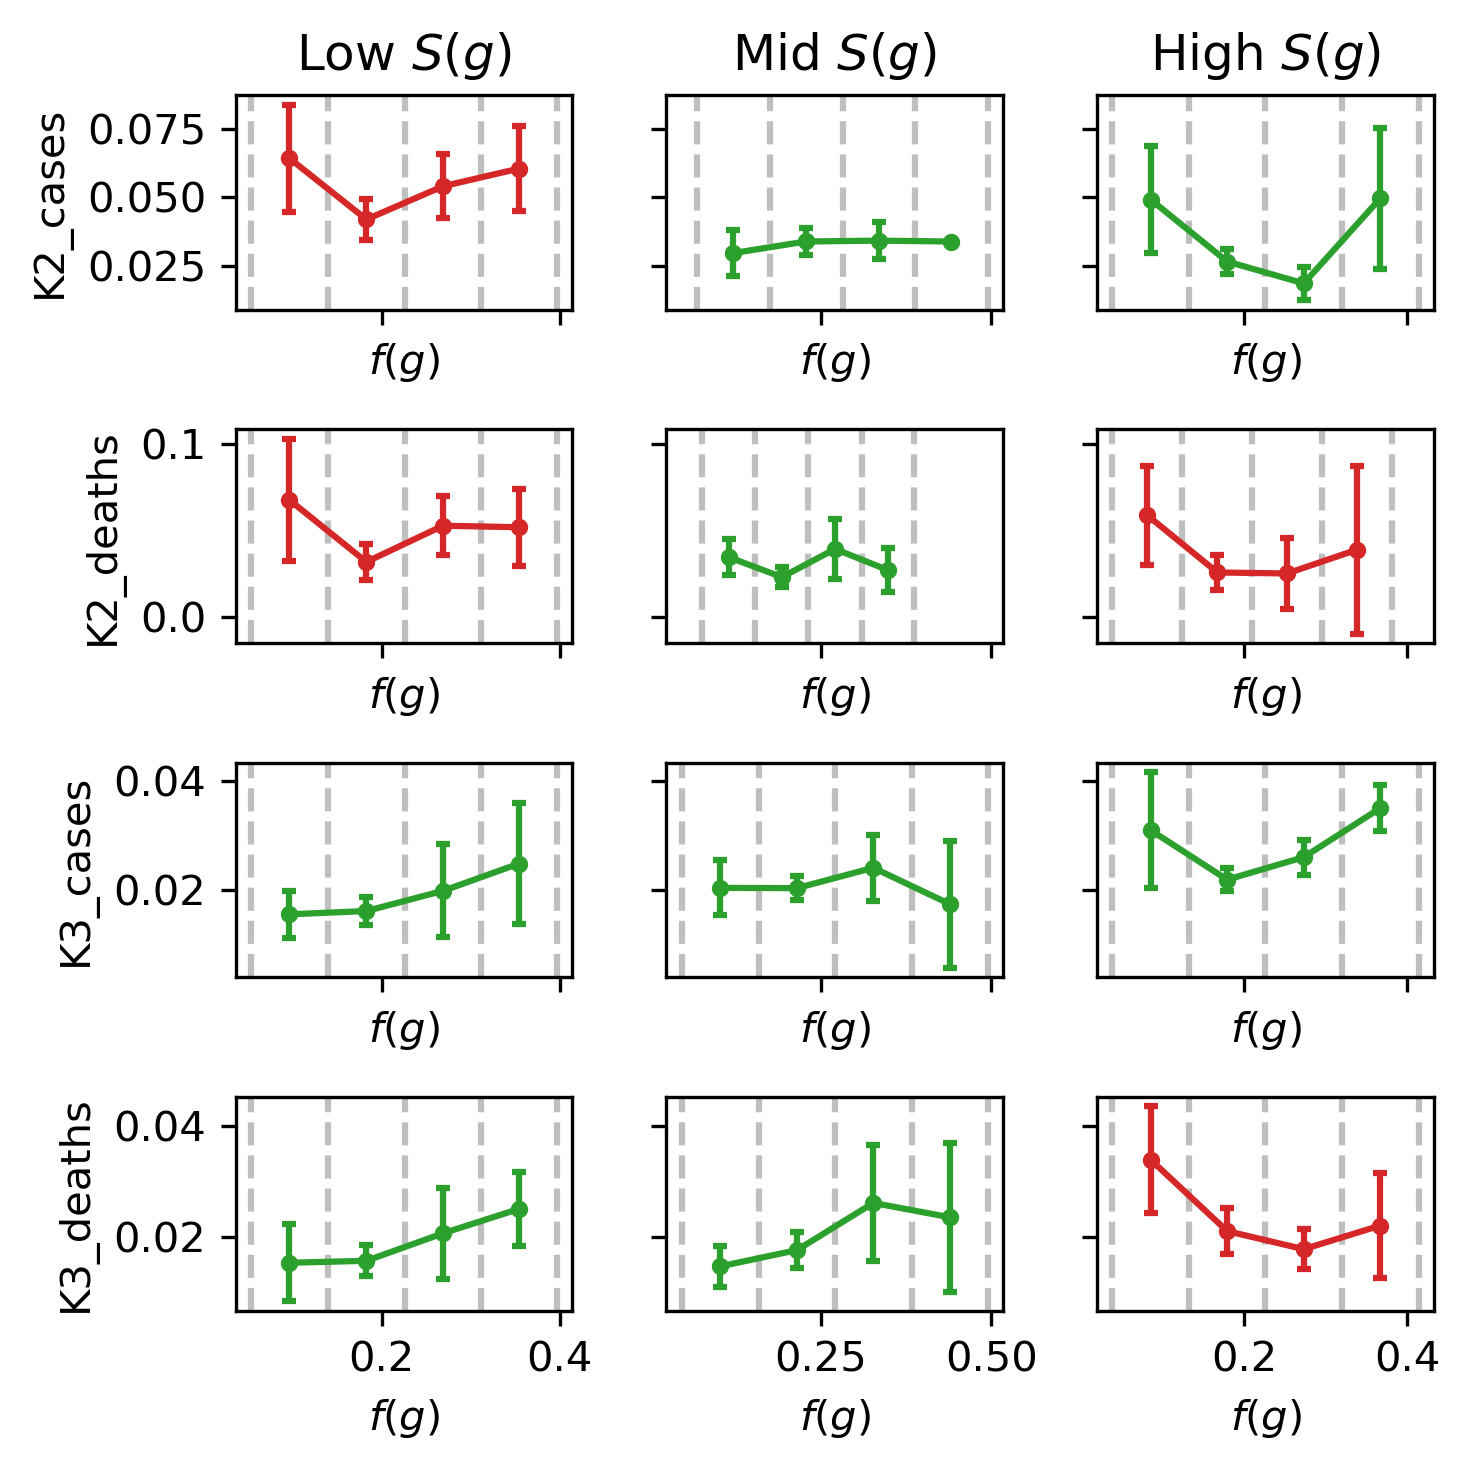

In [15]:
def binplot_dim(ax, x, y, nbins, **kwargs):
    df_xy = pd.DataFrame({'x':x,'y':y})
    df_xy = df_xy.sort_values('x')
    df_xy['xbin'] = pd.cut(df_xy['x'], nbins,)

    df_mean = df_xy.groupby('xbin').mean().reset_index()
    df_mean = df_mean[['xbin','y']]
    df_mean.columns = ['xbin','ybar']  

    df_xy = df_xy.merge(df_mean, how='left', on='xbin')
    df_xy['ysqerr'] = (df_xy['y']-df_xy['ybar'])**2
    df_xy['count'] = 1
    df_xy = df_xy.groupby('xbin').sum()
    df_xy = df_xy.reset_index()

    xbin = [[i.left, i.right] for i in df_xy['xbin'].tolist()]
    df_xy['xbin'] = xbin
    df_xy['x'] = [sum(i)/2 for i in xbin]
    df_xy['ystdev'] = (df_xy['ysqerr']/df_xy['count'])**0.5
    df_xy['ybar'] = df_xy['y']/df_xy['count']
    df_xy['ci_95'] = 1.96*(df_xy['ystdev'] / df_xy['count']**0.5)


    #display(df_xy)
    #for k,v in kwargs.items():
    #    print(k,v)

    for i in xbin:
        ax.axvline(i[0], linestyle='--', c='grey', alpha=0.5)
    ax.axvline(xbin[-1][1], linestyle='--', c='grey', alpha=0.5)

    s = kwargs['s']
    linewidth = s/10 if s > 20 else 1.5

    ax.plot(df_xy['x'], df_xy['ybar'],c=kwargs['c'], linewidth = linewidth, label=kwargs['label'])
    ax.scatter(df_xy['x'], df_xy['ybar'],c=kwargs['c'], s = s)
    
    x_mid = df_xy['x'].tolist()
    ybar = df_xy['ybar'].tolist()
    ci95 = df_xy['ci_95'].tolist()
    


    for i in range(len(x_mid)):
        xt = x_mid[i]
        ymin = ybar[i]-ci95[i]
        ymax = ybar[i]+ci95[i]
        ax.vlines(x_mid[i], ymin=ymin, ymax=ymax, colors=kwargs['c'], linewidth = linewidth)
        ax.scatter([xt,xt],[ymin,ymax], marker='_', c=kwargs['c'], s=s)
    return ax



selection_metrics = ['CBSA_c2_workplace_closing','CBSA_c6_stay_at_home_requirements','CBSA_c1_school_closing', 'CBSA_h6_facial_coverings']
var_list = ['K2_cases','K2_deaths','K3_cases', 'K3_deaths']

def condition(df,a,b):
    return 1 if df[b] == df[b] else 0

# def stringency_bin_f_k_plotter(ax,df,var,metric_a,metric_b, bin):
#     m,b = np.polyfit(df['ALL_fpll'], df[var], 1)
#     if m > 0:
#         c='tab:green'
#     else:
#         c='tab:red'
#     ax.scatter(df['ALL_fpll'], df[var],c=c)
#     ax.plot(df['ALL_fpll'], df['ALL_fpll']*m+b)
#     ax.set_xlabel('$f(g)$')
#     ax.set_ylabel(var)
#     #ax.title(metric_a +' '+metric_b + ' ' + bin)


for i in range(len(selection_metrics)-1):
    for j in range(i+1,len(selection_metrics)):
        fig, axes = plt.subplots(4,3, figsize=(5,5), dpi=300, sharex='col', sharey='row')
        metric_a = selection_metrics[i]
        metric_b = selection_metrics[j]
        for var_idx in range(len(var_list)):
            temp_df = copy.deepcopy(cbsa_df[['GTCBSA','ALL_fpll',var_list[var_idx], metric_a, metric_b]])
            temp_df = temp_df[temp_df['ALL_fpll']>0]
            temp_df = temp_df[temp_df[var_list[var_idx]]>0]
            temp_vec = sorted([i%n_bins for i in range(len(temp_df))])
            for k in [metric_a,metric_b]:
                temp_df = temp_df.sort_values(k)
                temp_df[k+'_bin'] = temp_vec
            temp_df['dual_stringency'] = temp_df.apply(lambda x: condition(x,metric_a,metric_b), axis=1)
            #display(temp_df)
            temp_df_b0 = copy.deepcopy(temp_df[temp_df[metric_a+'_bin']==0].sort_values('ALL_fpll'))
            temp_df_b1 = copy.deepcopy(temp_df[temp_df[metric_a+'_bin']==1].sort_values('ALL_fpll'))
            temp_df_b2 = copy.deepcopy(temp_df[temp_df[metric_a+'_bin']==2].sort_values('ALL_fpll'))
            #display(temp_df_b1)
            # stringency_bin_f_k_plotter(axes[var_idx,0], temp_df_b0,var_list[var_idx],metric_a,metric_b, 'bin_low')
            # stringency_bin_f_k_plotter(axes[var_idx,1], temp_df_b1,var_list[var_idx],metric_a,metric_b, 'bin_mid')
            # stringency_bin_f_k_plotter(axes[var_idx,2], temp_df_b2,var_list[var_idx],metric_a,metric_b, 'bin_high')
            cs = []
            for tdf in [temp_df_b0, temp_df_b1, temp_df_b2]:
                m,b = np.polyfit(tdf['ALL_fpll'], tdf[var_list[var_idx]], 1)
                if m>0:
                    cs.append('tab:green')
                else:
                    cs.append('tab:red')
            axes[var_idx,0] = binplot_dim(axes[var_idx,0], temp_df_b0['ALL_fpll'], temp_df_b0[var_list[var_idx]],4, c=cs[0],s=10, label='')
            axes[var_idx,1] = binplot_dim(axes[var_idx,1], temp_df_b1['ALL_fpll'], temp_df_b1[var_list[var_idx]],4, c=cs[1],s=10, label='')
            axes[var_idx,2] = binplot_dim(axes[var_idx,2], temp_df_b2['ALL_fpll'], temp_df_b2[var_list[var_idx]],4, c=cs[2],s=10, label='')
            axes[var_idx,0].set_xlabel('$f(g)$')
            axes[var_idx,1].set_xlabel('$f(g)$')
            axes[var_idx,2].set_xlabel('$f(g)$')
            axes[var_idx,0].set_ylabel(var_list[var_idx])
            #axes[var_idx,1].set_ylabel(var_list[var_idx])
            #axes[var_idx,2].set_ylabel(var_list[var_idx])
        axes[0,0].set_title('Low $S(g)$')
        axes[0,1].set_title('Mid $S(g)$')
        axes[0,2].set_title('High $S(g$)')
        #plt.suptitle(metric_a+' \n& '+metric_b)
        plt.tight_layout()
        print(metric_a, metric_b)
        

## Confirm Selections

In [17]:
temp_df_b1

GTCBSA  ALL_fpll  K3_deaths  CBSA_c1_school_closing  \
777   43780  0.046513   0.019910                2.473963   
142   16300  0.068674   0.016168                2.465306   
162   17300  0.076279   0.011035                2.440816   
741   42340  0.079985   0.009518                2.440816   
229   20100  0.080034   0.012251                2.485714   
..      ...       ...        ...                     ...   
91    13980  0.365920   0.045426                2.477551   
443   29340  0.372911   0.006410                2.469388   
378   26580  0.376779   0.014593                2.482045   
275   22140  0.387492   0.013756                2.440816   
93    14020  0.494873   0.033223                2.469388   

     CBSA_h6_facial_coverings  CBSA_c1_school_closing_bin  \
777                       1.0                           1   
142                       1.0                           1   
162                       1.0                           1   
741                       1.0                           1   
229                       1.0                           1   
..                        ...                         ...   
91                        1.0                           1   
443                       1.0                           1   
378                       1.0                           1   
275                       1.0                           1   
93                        1.0                           1   

     CBSA_h6_facial_coverings_bin  dual_stringency  
777                             0                1  
142                             0                1  
162                             2                1  
741                             2                1  
229                             0                1  
..                            ...              ...  
91                              0                1  
443                             0                1  
378                             0                1  
275                             2                1  
93                              0                1  

[75 rows x 8 columns]

In [20]:
tdf

GTCBSA  ALL_fpll  K3_deaths  CBSA_c1_school_closing  \
283   22420  0.134242   0.013534                2.497959   
67    12980  0.139312   0.025546                2.497959   

     CBSA_h6_facial_coverings  CBSA_c1_school_closing_bin  \
283                       1.0                           2   
67                        1.0                           2   

     CBSA_h6_facial_coverings_bin  dual_stringency  
283                             0                1  
67                              0                1

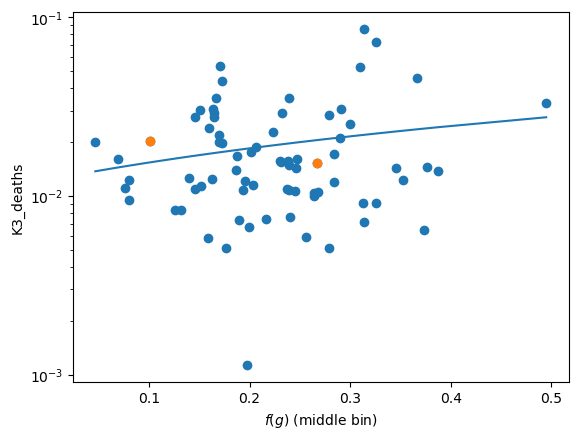

GTCBSA  ALL_fpll  K3_deaths  CBSA_c1_school_closing  \
584   35380  0.197413   0.001135                2.469388   
352   25540  0.176691   0.005107                2.477551   
423   28420  0.279314   0.005136                2.469388   

     CBSA_h6_facial_coverings  CBSA_c1_school_closing_bin  \
584                       1.0                           1   
352                       1.0                           1   
423                       1.0                           1   

     CBSA_h6_facial_coverings_bin  dual_stringency  
584                             0                1  
352                             0                1  
423                             0                1

GTCBSA  ALL_fpll  K3_deaths  CBSA_c1_school_closing  \
261   21500  0.170914   0.053574                2.440816   
553   34060  0.325960   0.072761                2.469388   
736   42140  0.313376   0.085916                2.440816   

     CBSA_h6_facial_coverings  CBSA_c1_school_closing_bin  \
261                       1.0                           1   
553                       1.0                           1   
736                       1.0                           1   

     CBSA_h6_facial_coverings_bin  dual_stringency  
261                             2                1  
553                             0                1  
736                             2                1

In [18]:
var = 'K3_deaths'

plt.scatter(temp_df_b1['ALL_fpll'], temp_df_b1[var])
m,b = np.polyfit(temp_df_b1['ALL_fpll'], temp_df_b1[var], 1)
plt.plot(temp_df_b1['ALL_fpll'], temp_df_b1['ALL_fpll']*m+b)
tdf = temp_df_b1[temp_df_b1['GTCBSA'].isin([17420,39820,28700,41860])]
#tdf = temp_df_b1[temp_df_b1['GTCBSA'].isin([18580,15680, 34740,30980])]
plt.scatter(tdf['ALL_fpll'], tdf[var])
plt.xlabel('$f(g)$ (middle bin)')
plt.ylabel(var)
plt.yscale('log')
plt.show()

display(temp_df_b1[temp_df_b1[var]>0].sort_values(var).head(3))
display(temp_df_b1[temp_df_b1[var]>0].sort_values(var).tail(3))

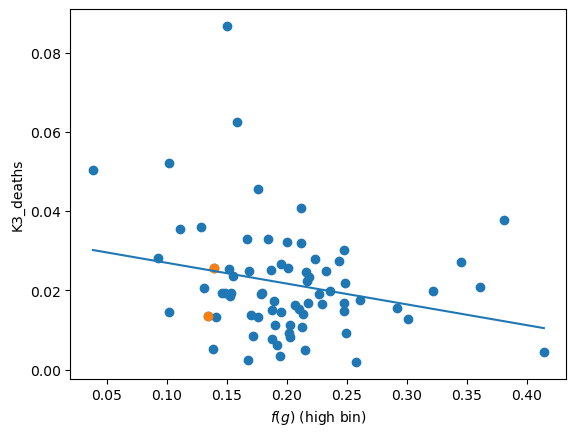

GTCBSA  ALL_fpll  K3_deaths  CBSA_c1_school_closing  \
826   45940  0.257534   0.001917                2.530612   
589   35620  0.167588   0.002517                2.508572   
137   16060  0.194041   0.003415                2.657143   
570   34740  0.414287   0.004521                2.497959   
784   44140  0.214871   0.004837                2.534694   
..      ...       ...        ...                     ...   
347   25260  0.175759   0.045505                3.000000   
874   48140  0.038528   0.050278                2.506122   
872   48060  0.101828   0.052048                2.497959   
735   42100  0.158293   0.062569                3.000000   
525   32780  0.150258   0.086767                2.530612   

     CBSA_h6_facial_coverings  CBSA_c1_school_closing_bin  \
826                       1.0                           2   
589                       1.0                           2   
137                       1.0                           2   
570                       1.0                           2   
784                       1.0                           2   
..                        ...                         ...   
347                       1.0                           2   
874                       1.0                           2   
872                       1.0                           2   
735                       1.0                           2   
525                       1.0                           2   

     CBSA_h6_facial_coverings_bin  dual_stringency  
826                             1                1  
589                             1                1  
137                             0                1  
570                             0                1  
784                             1                1  
..                            ...              ...  
347                             0                1  
874                             1                1  
872                             1                1  
735                             0                1  
525                             1                1  

[74 rows x 8 columns]

In [19]:
plt.scatter(temp_df_b2['ALL_fpll'], temp_df_b2[var])
tdf = temp_df_b2[temp_df_b2['GTCBSA'].isin([13980,15500,22420,12980])]
m,b = np.polyfit(temp_df_b2['ALL_fpll'], temp_df_b2[var], 1)
plt.plot(temp_df_b2['ALL_fpll'], temp_df_b2['ALL_fpll']*m+b)
plt.scatter(tdf['ALL_fpll'], tdf[var])
plt.xlabel('$f(g)$ (high bin)')
plt.ylabel(var)
plt.show()
display(temp_df_b2[temp_df_b2[var]>0].sort_values(var))

## Grouped Scatterplot for paper

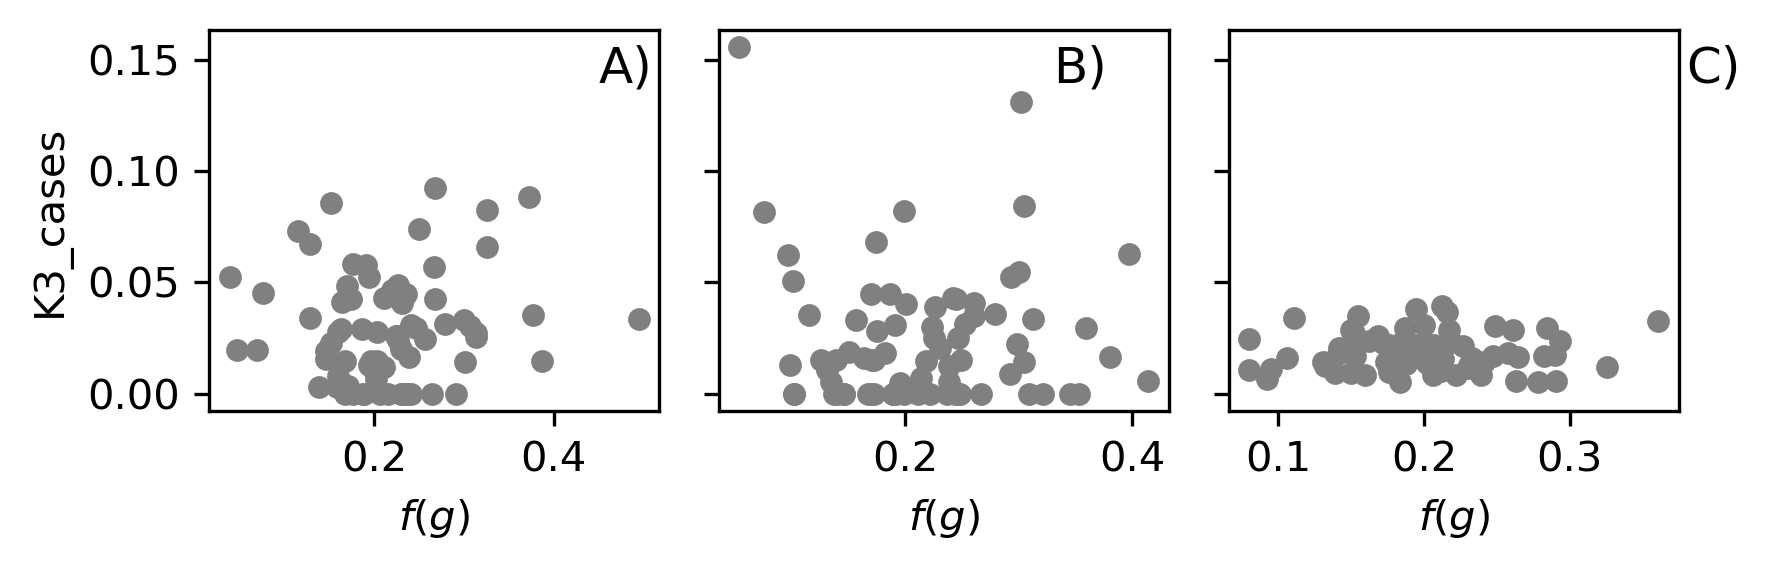

GTCBSA  ALL_fpll  K1_cases  K1_deaths  K2_cases  K2_deaths  K3_cases  \
594   35840  0.183801  0.270404   0.133239  0.050159   0.017357  0.005370   
600   36100  0.278414  0.247347   0.033789  0.060216   0.104684  0.005389   
285   22520  0.290623  0.340120   0.108365  0.038414   0.022506  0.005746   
50    12220  0.263031  0.398094   0.146630  0.049094   0.004695  0.005950   
734   42020  0.092675  0.457635   0.000000  0.033974   0.083758  0.006882   
..      ...       ...       ...        ...       ...        ...       ...   
264   21660  0.110881  0.163717   0.099021  0.062224   0.095302  0.033952   
134   15940  0.155075  0.242785   0.152135  0.016795   0.013902  0.034769   
211   19340  0.215818  0.408260   0.231049  0.019955   0.000000  0.036891   
783   44100  0.194860  0.146151   0.066830  0.016603   0.000000  0.038209   
684   39820  0.212284  0.172464   0.176252  0.046702   0.022882  0.039465   

     K3_deaths  CBSA_c2_workplace_closing  CBSA_c6_stay_at_home_requirements  \
594   0.000000                   1.706122                           1.897959   
600   0.009436                   1.706122                           1.897959   
285   0.000000                   1.212245                           1.204082   
50    0.027866                   1.212245                           1.204082   
734   0.028247                   2.028571                           1.195918   
..         ...                        ...                                ...   
264   0.035459                   2.085714                           1.220408   
134   0.023550                   1.583673                           1.253061   
211   0.024733                   1.274735                           1.227978   
783   0.026524                   1.228571                           1.416327   
684   0.031826                   2.028571                           1.195918   

     CBSA_c1_school_closing  CBSA_h6_facial_coverings  stay_at_home_bin  \
594                2.146939                       1.0                 2   
600                2.146939                       1.0                 2   
285                2.436735                       1.0                 2   
50                 2.436735                       1.0                 2   
734                3.000000                       1.0                 2   
..                      ...                       ...               ...   
264                2.530612                       1.0                 2   
134                2.583673                       1.0                 2   
211                2.570355                       1.0                 2   
783                2.657143                       1.0                 2   
684                3.000000                       1.0                 2   

     school_closing_bin  workplace_closing_bin  dual_stringency  
594                   0                      1                0  
600                   0                      1                0  
285                   0                      0                1  
50                    0                      0                1  
734                   2                      2                1  
..                  ...                    ...              ...  
264                   2                      2                1  
134                   2                      1                0  
211                   2                      0                0  
783                   2                      0                0  
684                   2                      2                1  

[76 rows x 16 columns]

In [50]:
fig, axes = plt.subplots(1,3,sharey=True,figsize=(6,2),dpi=300)

axes[0].text(x=0.45,y=0.14,s='A)',fontsize='large')
axes[1].text(x=0.33,y=0.14,s='B)',fontsize='large')
axes[2].text(x=0.38,y=0.14,s='C)',fontsize='large')

axes[0].scatter(temp_df_b0['ALL_fpll'], temp_df_b0['K2_cases'],s=20,c='grey')
axes[0].set_xlabel('$f(g)$')
axes[0].set_ylabel(var)

axes[1].scatter(temp_df_b1['ALL_fpll'], temp_df_b1['K2_cases'],s=20,c='grey')
tdf = temp_df_b1[temp_df_b1['GTCBSA'].isin([17420,39820,28700,41860])]
axes[1].scatter(tdf['ALL_fpll'], tdf[var],s=40,c='red')
axes[1].set_xlabel('$f(g)$')

axes[2].scatter(temp_df_b2['ALL_fpll'], temp_df_b2[var],s=20,c='grey')
tdf = temp_df_b2[temp_df_b2['GTCBSA'].isin([13980,15500,22420,12980])]
axes[2].scatter(tdf['ALL_fpll'], tdf[var], s=40,c='red')
axes[2].set_xlabel('$f(g)$')
plt.tight_layout()
plt.show()
display(temp_df_b2[temp_df_b2[var]>0].sort_values(var))

# TODO
1. Get hospital bed data - https://www.covidcaremap.org/maps/us-healthcare-system-capacity/#3.5/38/-96
2. get testing data- as granular in TIME and GEO as possible - Health and Human Services? CDC?
3. Check our world in data for these 
4. Check CDC data
5. Mobility if possible

# Hospital Bed Analysis

In [51]:
cbsa_df.columns

Index(['GTCBSA', 'ALL_fpll', 'SOCIAL_fpll', 'CARE_fpll', 'K1_deaths',
       'K2_deaths', 'K3_deaths', 'K1_cases', 'K2_cases', 'K3_cases', 'LOG_POP',
       '%_REPUBLICAN', '%_DEMOCRAT', '%_OTHER_VOTES', '%_GREEN',
       '%_LIBERTARIAN', 'Perc.Native', 'CBSA_c2_workplace_closing',
       'CBSA_c4_restrictions_on_gatherings',
       'CBSA_c6_stay_at_home_requirements', 'CBSA_h6_facial_coverings',
       'CBSA_c1_school_closing', 'CBSA_c3_cancel_public_events',
       'CBSA_c7_movementrestrictions', 'CBSA_c5_close_public_transport',
       'all_beds', 'icu_beds', 'licensed_beds', 'Pop'],
      dtype='object')

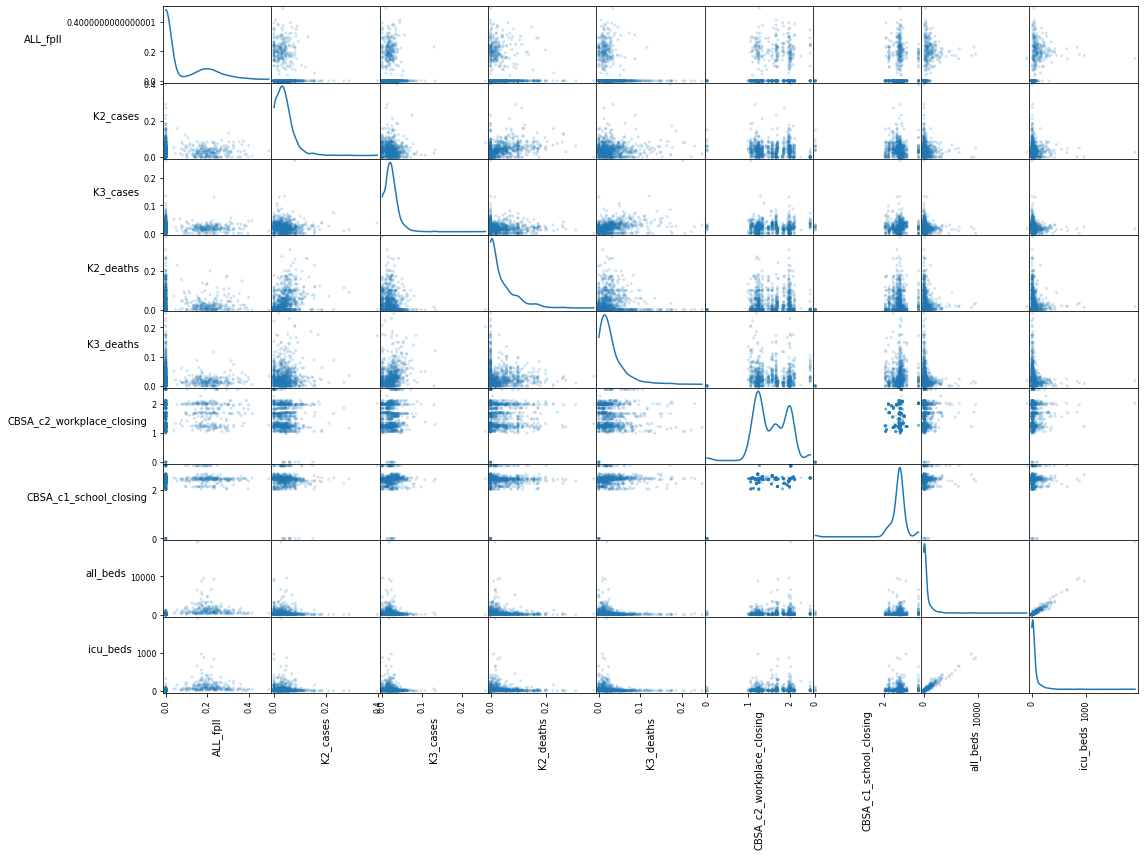

In [52]:
cbsa_df.head()

#limited_df = cbsa_df[['ALL_fpll','K2_cases','K3_cases','K2_deaths','K3_deaths','%_REPUBLICAN', 'Perc.Native','CBSA_c2_workplace_closing','CBSA_h6_facial_coverings','all_beds','icu_beds']]
limited_df = cbsa_df[['ALL_fpll','K2_cases','K3_cases','K2_deaths','K3_deaths','CBSA_c2_workplace_closing','CBSA_c1_school_closing','all_beds','icu_beds']]

axes = pd.plotting.scatter_matrix(limited_df, alpha=0.2, figsize=(16,12), diagonal='kde')
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

In [53]:
temp_df = copy.deepcopy(cbsa_df)

temp_df['K3_ratio'] = temp_df['K3_deaths']/temp_df['K3_cases']
temp_df['K2_ratio'] = temp_df['K2_deaths']/temp_df['K2_cases']
temp_df = temp_df[temp_df['K3_ratio'] > 0]
temp_df = temp_df[temp_df['K3_ratio'] < 100000]
temp_df = temp_df[temp_df['K2_ratio'] > 0]
temp_df = temp_df[temp_df['K2_ratio'] < 100000]
temp_df = temp_df[temp_df['ALL_fpll'] > 0]
temp_df['beds_per_capita'] = temp_df['all_beds'] / temp_df['Pop']
temp_df

GTCBSA  ALL_fpll  SOCIAL_fpll  CARE_fpll  K1_deaths  K2_deaths  \
18    10900  0.195679     0.143984   0.050736   0.228406   0.008301   
32    11540  0.202735     0.202735   0.022682   0.123776   0.016661   
47    12100  0.201497     0.174334   0.154366   0.247553   0.020520   
50    12220  0.263031     0.161223   0.123275   0.146630   0.004695   
51    12260  0.325509     0.281364   0.115673   0.209039   0.019219   
..      ...       ...          ...        ...        ...        ...   
861   47580  0.145170     0.109405   0.014634   0.301283   0.026821   
869   47940  0.166852     0.158087   0.049953   0.328412   0.006217   
874   48140  0.038528     0.038528   0.020444   0.000000   0.070222   
883   48660  0.075517     0.075517   0.058682   0.099021   0.153970   
893   49180  0.359290     0.324430   0.125245   0.254675   0.022307   

     K3_deaths  K1_cases  K2_cases  K3_cases  ...  \
18    0.012155  0.317188  0.004696  0.025658  ...   
32    0.008084  0.201008  0.027733  0.024147  ...   
47    0.009219  0.206712  0.007424  0.014300  ...   
50    0.027866  0.398094  0.049094  0.005950  ...   
51    0.009174  0.349724  0.045885  0.011937  ...   
..         ...       ...       ...       ...  ...   
861   0.010979  0.276726  0.033909  0.020228  ...   
869   0.035442  0.237278  0.014776  0.029930  ...   
874   0.050278  0.369481  0.052416  0.050308  ...   
883   0.060315  0.277056  0.081755  0.028066  ...   
893   0.011592  0.212117  0.029533  0.015628  ...   

     CBSA_c3_cancel_public_events  CBSA_c7_movementrestrictions  \
18                       1.594208                      1.149762   
32                       1.102041                      1.000000   
47                       1.159184                      1.000000   
50                       1.146939                      1.000000   
51                       1.728898                      1.000000   
..                            ...                           ...   
861                      2.000000                      1.000000   
869                      1.126531                      1.000000   
874                      1.102041                      1.000000   
883                      1.983673                      1.081633   
893                      1.085714                      1.057143   

     CBSA_c5_close_public_transport     all_beds    icu_beds  licensed_beds  \
18                         0.560324   987.613944   99.577247    1077.175056   
32                         1.000000   372.555044   50.438827     412.748485   
47                         0.314286  1361.000000  102.000000    1484.000000   
50                         0.485714   477.000000   36.000000     500.000000   
51                         0.459702  1191.989666  198.706726    1583.071986   
..                              ...          ...         ...            ...   
861                        0.624490   227.570189   29.153105     227.570189   
869                        0.465306   307.074683   22.643829     540.189642   
874                        1.000000   338.000000   52.000000     440.000000   
883                        0.000000   754.343531   22.241734     780.292220   
893                        1.000000  1624.168393  181.782634    1734.970457   

          Pop  K3_ratio  K2_ratio  beds_per_capita  
18   837610.0  0.473744  1.767589         0.001179  
32   235628.0  0.334794  0.600786         0.001581  
47   266105.0  0.644693  2.764012         0.005115  
50   161152.0  4.683007  0.095637         0.002960  
51   441055.0  0.768519  0.418841         0.002703  
..        ...       ...       ...              ...  
861  191868.0  0.542736  0.790970         0.001186  
869  169556.0  1.184176  0.420710         0.001811  
874  135396.0  0.999406  1.339703         0.002496  
883  141999.0  2.148999  1.883321         0.005312  
893  666216.0  0.741724  0.755337         0.002438  

[116 rows x 32 columns]

SpearmanrResult(correlation=0.22853957636566335, pvalue=0.013604546651366286)


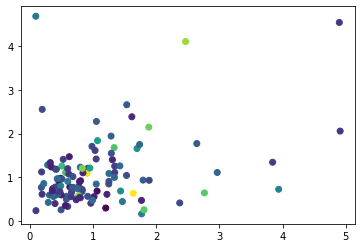

In [54]:
plt.scatter(temp_df['K2_ratio'], temp_df['K3_ratio'], c=temp_df['beds_per_capita'])
print(stats.spearmanr(temp_df['K2_ratio'], temp_df['K3_ratio']))

SpearmanrResult(correlation=0.19045092838196287, pvalue=0.04058074723237682)


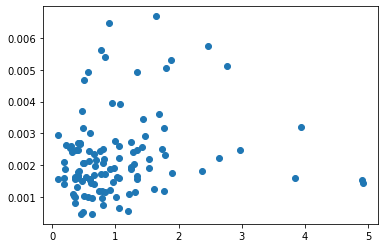

In [55]:
plt.scatter(temp_df['K2_ratio'], temp_df['beds_per_capita'])
print(stats.spearmanr(temp_df['K2_ratio'], temp_df['beds_per_capita']))

SpearmanrResult(correlation=0.1392380732710568, pvalue=0.1360479404705318)


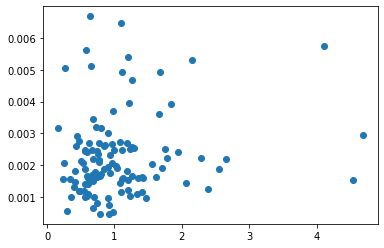

In [56]:
plt.scatter(temp_df['K3_ratio'], temp_df['beds_per_capita'])
print(stats.spearmanr(temp_df['K3_ratio'], temp_df['beds_per_capita']))

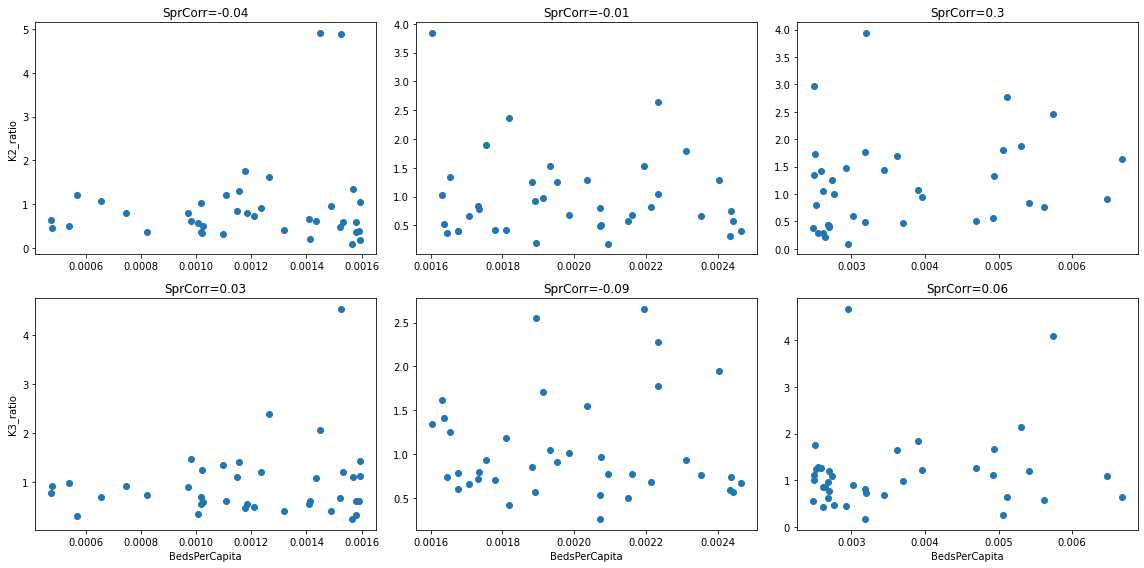

In [57]:
bins = 3
temp_vec = sorted([i%bins for i in range(len(temp_df))])
temp_df = temp_df.sort_values('beds_per_capita')
temp_df['beds_bin'] = temp_vec

fig, axes = plt.subplots(2,3, figsize=(16,8))#, sharey = True, sharex = True)
for b in range(bins):
    tdf = temp_df[temp_df['beds_bin']==b]
    axes[0,b].scatter(tdf['beds_per_capita'], tdf['K2_ratio'])
    p = stats.spearmanr(tdf['K2_ratio'], tdf['beds_per_capita'])
    axes[0,b].set_title('SprCorr='+str(int(p[0]*100)/100))
    axes[1,b].scatter(tdf['beds_per_capita'], tdf['K3_ratio'])
    p = stats.spearmanr(tdf['K3_ratio'], tdf['beds_per_capita'])
    axes[1,b].set_title('SprCorr='+str(int(p[0]*100)/100))
axes[0,0].set_ylabel('K2_ratio')
axes[1,0].set_ylabel('K3_ratio')
axes[1,0].set_xlabel('BedsPerCapita')
axes[1,1].set_xlabel('BedsPerCapita')
axes[1,2].set_xlabel('BedsPerCapita')
plt.tight_layout()
plt.show()

In [58]:
temp_df.columns

Index(['GTCBSA', 'ALL_fpll', 'SOCIAL_fpll', 'CARE_fpll', 'K1_deaths',
       'K2_deaths', 'K3_deaths', 'K1_cases', 'K2_cases', 'K3_cases', 'LOG_POP',
       '%_REPUBLICAN', '%_DEMOCRAT', '%_OTHER_VOTES', '%_GREEN',
       '%_LIBERTARIAN', 'Perc.Native', 'CBSA_c2_workplace_closing',
       'CBSA_c4_restrictions_on_gatherings',
       'CBSA_c6_stay_at_home_requirements', 'CBSA_h6_facial_coverings',
       'CBSA_c1_school_closing', 'CBSA_c3_cancel_public_events',
       'CBSA_c7_movementrestrictions', 'CBSA_c5_close_public_transport',
       'all_beds', 'icu_beds', 'licensed_beds', 'Pop', 'K3_ratio', 'K2_ratio',
       'beds_per_capita', 'beds_bin'],
      dtype='object')

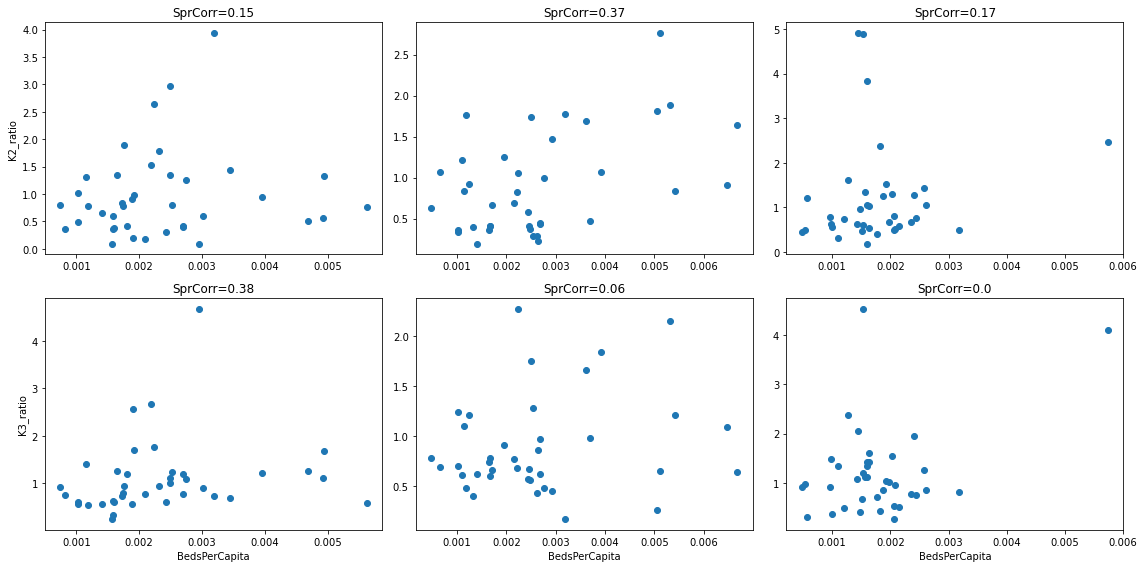

In [59]:
bins = 3
temp_vec = sorted([i%3 for i in range(len(temp_df))])
temp_df = temp_df.sort_values('CBSA_c2_workplace_closing')
temp_df['string_bin'] = temp_vec

fig, axes = plt.subplots(2,3, figsize=(16,8))#, sharey = True, sharex = True)
for b in range(bins):
    tdf = temp_df[temp_df['string_bin']==b]
    axes[0,b].scatter(tdf['beds_per_capita'], tdf['K2_ratio'])
    p = stats.spearmanr(tdf['K2_ratio'], tdf['beds_per_capita'])
    axes[0,b].set_title('SprCorr='+str(int(p[0]*100)/100))
    axes[1,b].scatter(tdf['beds_per_capita'], tdf['K3_ratio'])
    p = stats.spearmanr(tdf['K3_ratio'], tdf['beds_per_capita'])
    axes[1,b].set_title('SprCorr='+str(int(p[0]*100)/100))
axes[0,0].set_ylabel('K2_ratio')
axes[1,0].set_ylabel('K3_ratio')
axes[1,0].set_xlabel('BedsPerCapita')
axes[1,1].set_xlabel('BedsPerCapita')
axes[1,2].set_xlabel('BedsPerCapita')
plt.tight_layout()
plt.show()

(907, 29)


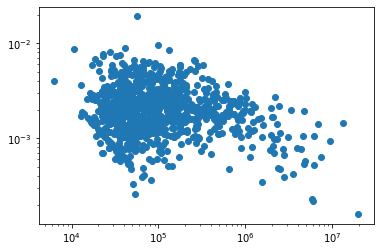

In [60]:
print(cbsa_df.shape)

temp_cbsa = copy.deepcopy(cbsa_df[cbsa_df['ALL_fpll']>0])
temp_cbsa = copy.deepcopy(cbsa_df)#[cbsa_df['ALL_fpll']>0])

plt.scatter(temp_cbsa['Pop'],temp_cbsa['all_beds']/temp_cbsa['Pop'])
plt.yscale('log') 
plt.xscale('log') 

(907, 29)


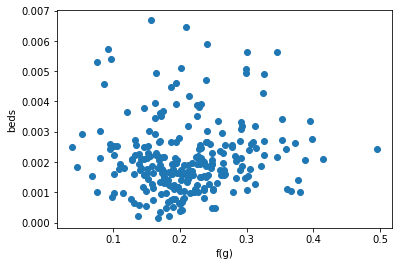

SpearmanrResult(correlation=0.09064649126775856, pvalue=0.1473166987034618)

In [61]:
print(cbsa_df.shape)

temp_cbsa = copy.deepcopy(cbsa_df[cbsa_df['ALL_fpll']>0])

plt.scatter(temp_cbsa['ALL_fpll'],temp_cbsa['all_beds']/temp_cbsa['Pop'])
plt.ylabel('beds')
plt.xlabel('f(g)')
#plt.yscale('log') 
#plt.xscale('log') 
plt.show()

s = stats.spearmanr(temp_cbsa['ALL_fpll'],temp_cbsa['all_beds']/temp_cbsa['Pop'])
s

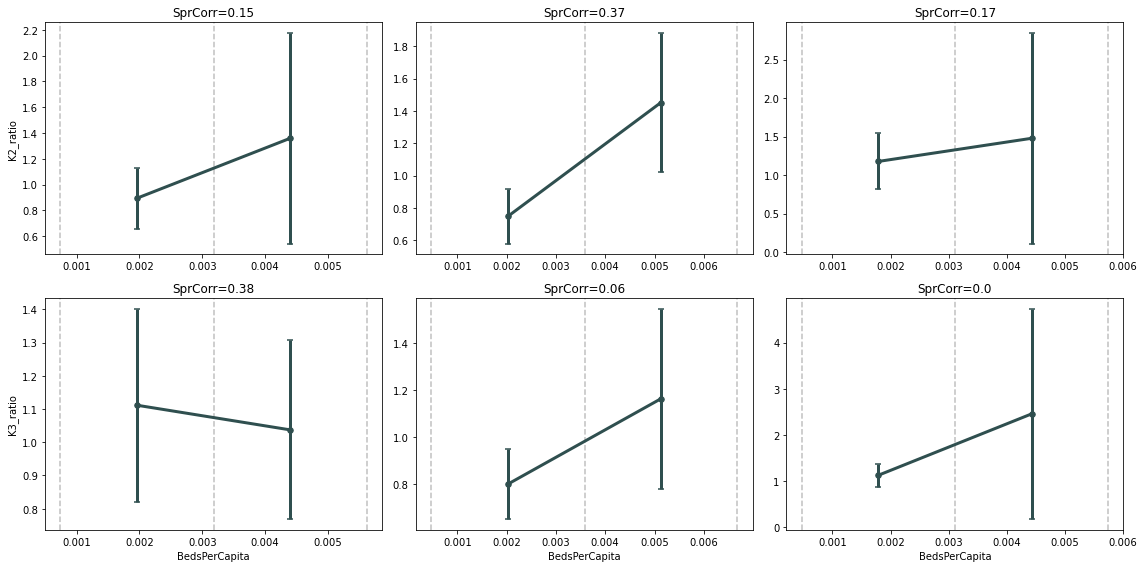

In [62]:

bins = 3
plotbins = 2

temp_vec = sorted([i%3 for i in range(len(temp_df))])
temp_df = temp_df.sort_values('CBSA_c2_workplace_closing')
temp_df['string_bin'] = temp_vec

fig, axes = plt.subplots(2,3, figsize=(16,8))#, sharey = True, sharex = True)
for b in range(bins):
    tdf = temp_df[temp_df['string_bin']==b]

    #axes[0,b].scatter(tdf['beds_per_capita'], tdf['K2_ratio'])
    axes[0,b] = binplot_dim(axes[0,b], tdf['beds_per_capita'], tdf['K2_ratio'], plotbins, c='darkslategrey',s=30, label='')

    p = stats.spearmanr(tdf['K2_ratio'], tdf['beds_per_capita'])
    axes[0,b].set_title('SprCorr='+str(int(p[0]*100)/100))

    #axes[1,b].scatter(tdf['beds_per_capita'], tdf['K3_ratio'])
    axes[1,b] = binplot_dim(axes[1,b], tdf['beds_per_capita'], tdf['K3_ratio'], plotbins, c='darkslategrey',s=30, label='')
    
    p = stats.spearmanr(tdf['K3_ratio'], tdf['beds_per_capita'])
    axes[1,b].set_title('SprCorr='+str(int(p[0]*100)/100))
axes[0,0].set_ylabel('K2_ratio')
axes[1,0].set_ylabel('K3_ratio')
axes[1,0].set_xlabel('BedsPerCapita')
axes[1,1].set_xlabel('BedsPerCapita')
axes[1,2].set_xlabel('BedsPerCapita')
plt.tight_layout()
plt.show()

In [63]:
mobility = pd.read_csv('CBSA_fb_mobility.csv')
temp_df = copy.deepcopy(cbsa_df)

temp_df = temp_df.merge(mobility, on='GTCBSA', how='inner')
temp_df.head()

GTCBSA  ALL_fpll  SOCIAL_fpll  CARE_fpll  K1_deaths  K2_deaths  K3_deaths  \
0   10100  0.000000     0.000000   0.000000   0.000000   0.000000   0.071113   
1   10140  0.000000     0.000000   0.000000   0.000000   0.123776   0.037184   
2   10180  0.231019     0.212377   0.048661   0.067069   0.014818   0.000000   
3   10220  0.000000     0.000000   0.000000   0.099021   0.057924   0.054147   
4   10300  0.000000     0.000000   0.000000   0.123776   0.073980   0.063128   

   K1_cases  K2_cases  K3_cases  ...  CBSA_c7_movementrestrictions  \
0  0.204861  0.027668  0.021953  ...                      1.000000   
1  0.214707  0.043326  0.000000  ...                      1.000000   
2  0.414097  0.020414  0.130096  ...                      1.081633   
3  0.171522  0.046909  0.002207  ...                      1.000000   
4  0.257475  0.020088  0.029262  ...                      1.126531   

   CBSA_c5_close_public_transport    all_beds   icu_beds  licensed_beds  \
0                         0.00000   89.241150   5.452316     143.764314   
1                         1.00000   59.000000   8.000000     164.000000   
2                         0.00000  615.138139  57.606321     837.772410   
3                         0.42449  240.000000  12.000000     276.000000   
4                         1.00000  113.000000   9.000000     113.000000   

        Pop  stayed_home_wave2  stayed_home_wave3  tiles_visited_wave2  \
0   42824.0           0.156818           0.178030             0.062896   
1   72779.0           0.210459           0.248831             0.015599   
2  156813.0           0.173611           0.174781            -0.044443   
3   38355.0           0.174615           0.184636            -0.016122   
4   98381.0           0.177960           0.199799            -0.007635   

   tiles_visited_wave3  
0            -0.035946  
1            -0.105523  
2            -0.067847  
3            -0.068624  
4            -0.086287  

[5 rows x 33 columns]

In [64]:
temp_df.columns

Index(['GTCBSA', 'ALL_fpll', 'SOCIAL_fpll', 'CARE_fpll', 'K1_deaths',
       'K2_deaths', 'K3_deaths', 'K1_cases', 'K2_cases', 'K3_cases', 'LOG_POP',
       '%_REPUBLICAN', '%_DEMOCRAT', '%_OTHER_VOTES', '%_GREEN',
       '%_LIBERTARIAN', 'Perc.Native', 'CBSA_c2_workplace_closing',
       'CBSA_c4_restrictions_on_gatherings',
       'CBSA_c6_stay_at_home_requirements', 'CBSA_h6_facial_coverings',
       'CBSA_c1_school_closing', 'CBSA_c3_cancel_public_events',
       'CBSA_c7_movementrestrictions', 'CBSA_c5_close_public_transport',
       'all_beds', 'icu_beds', 'licensed_beds', 'Pop', 'stayed_home_wave2',
       'stayed_home_wave3', 'tiles_visited_wave2', 'tiles_visited_wave3'],
      dtype='object')

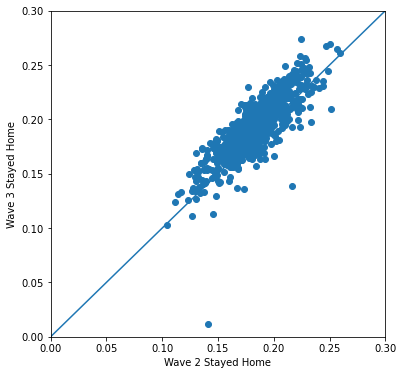

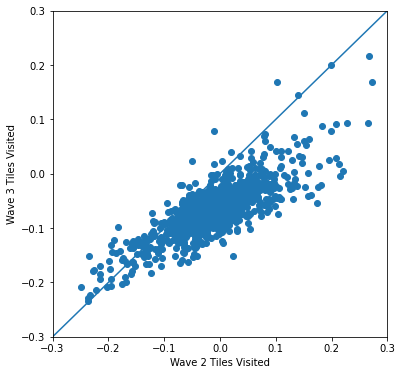

In [65]:
plt.figure(figsize=(6,6))
plt.scatter(temp_df['stayed_home_wave2'], temp_df['stayed_home_wave3'])
plt.xlabel('Wave 2 Stayed Home')
plt.ylabel('Wave 3 Stayed Home')
plt.plot([0,0.3],[0,0.3])
plt.ylim(0,0.3)
plt.xlim(0,0.3)
plt.show()

plt.figure(figsize=(6,6))
plt.scatter(temp_df['tiles_visited_wave2'], temp_df['tiles_visited_wave3'])
plt.xlabel('Wave 2 Tiles Visited')
plt.ylabel('Wave 3 Tiles Visited')
plt.plot([-0.3,0.3],[-0.3,0.3])
plt.ylim(-0.3,0.3)
plt.xlim(-0.3,0.3)
plt.show()

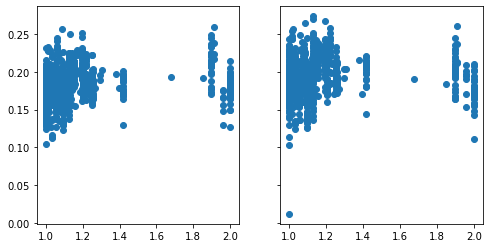

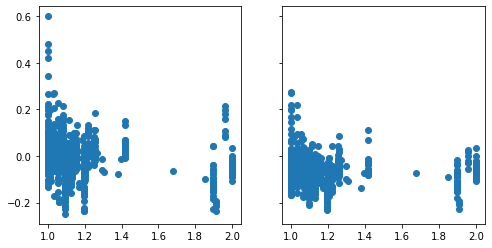

In [66]:
fig, axes = plt.subplots(1,2,figsize=(8,4), sharey=True)
axes[0].scatter(temp_df['CBSA_c6_stay_at_home_requirements'], temp_df['stayed_home_wave2'])
axes[1].scatter(temp_df['CBSA_c6_stay_at_home_requirements'], temp_df['stayed_home_wave3'])
fig, axes = plt.subplots(1,2,figsize=(8,4), sharey=True)
axes[0].scatter(temp_df['CBSA_c6_stay_at_home_requirements'], temp_df['tiles_visited_wave2'])
axes[1].scatter(temp_df['CBSA_c6_stay_at_home_requirements'], temp_df['tiles_visited_wave3'])

In [68]:
#temp_df_backup = copy.deepcopy(temp_df)
temp_df = copy.deepcopy(temp_df_backup)

In [69]:
temp_df = temp_df[temp_df['ALL_fpll']>0]
temp_df = temp_df[temp_df[var]>0]
temp_vec = sorted([i%n_bins for i in range(len(temp_df))])
temp_df = temp_df.sort_values('CBSA_c6_stay_at_home_requirements')
temp_df['stay_at_home_bin'] = temp_vec
temp_df = temp_df.sort_values('CBSA_c1_school_closing')
temp_df['school_closing_bin'] = temp_vec
temp_df = temp_df.sort_values('CBSA_c2_workplace_closing')
temp_df['workplace_closing_bin'] = temp_vec


def condition(df):
    return 1 if df['workplace_closing_bin'] == df['school_closing_bin'] else 0

temp_df['dual_stringency'] = temp_df.apply(lambda x: condition(x), axis=1)

temp_df_b0 = copy.deepcopy(temp_df[temp_df['stay_at_home_bin']==0].sort_values('ALL_fpll'))
temp_df_b1 = copy.deepcopy(temp_df[temp_df['stay_at_home_bin']==1].sort_values('ALL_fpll'))
temp_df_b2 = copy.deepcopy(temp_df[temp_df['stay_at_home_bin']==2].sort_values('ALL_fpll'))

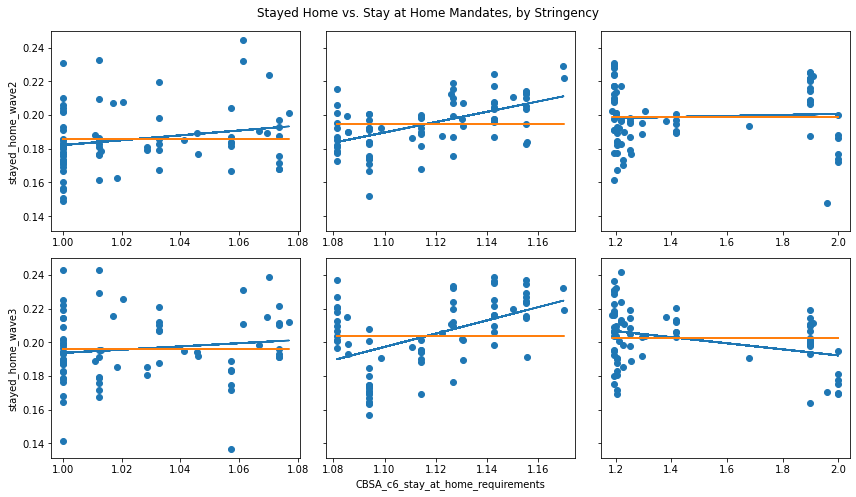

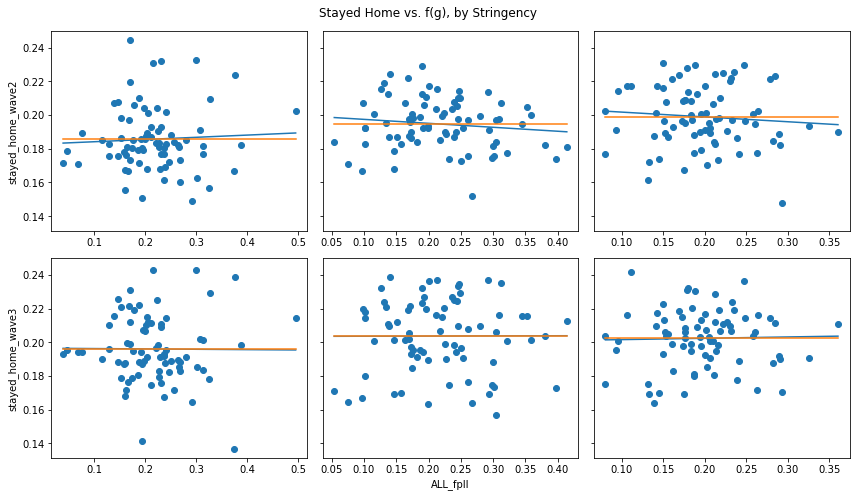

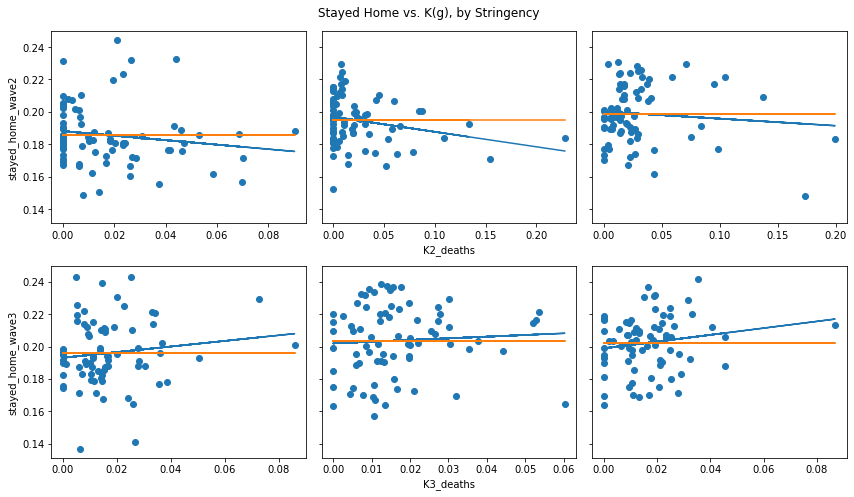

In [70]:
fig, axes = plt.subplots(2,3,figsize=(12,7), sharey=True)
dfs = [temp_df_b0, temp_df_b1, temp_df_b2]
for i in range(3):
    df = dfs[i]
    axes[0,i].scatter(df['CBSA_c6_stay_at_home_requirements'], df['stayed_home_wave2'])
    m,b = np.polyfit(df['CBSA_c6_stay_at_home_requirements'], df['stayed_home_wave2'], 1)
    axes[0,i].plot(df['CBSA_c6_stay_at_home_requirements'], df['CBSA_c6_stay_at_home_requirements']*m+b)
    mu = df['stayed_home_wave2'].mean()
    axes[0,i].plot(df['CBSA_c6_stay_at_home_requirements'], [mu for i in range(len(df['CBSA_c6_stay_at_home_requirements']))])
    axes[1,i].scatter(df['CBSA_c6_stay_at_home_requirements'], df['stayed_home_wave3'])
    m,b = np.polyfit(df['CBSA_c6_stay_at_home_requirements'], df['stayed_home_wave3'], 1)
    axes[1,i].plot(df['CBSA_c6_stay_at_home_requirements'], df['CBSA_c6_stay_at_home_requirements']*m+b)
    mu = df['stayed_home_wave3'].mean()
    axes[1,i].plot(df['CBSA_c6_stay_at_home_requirements'], [mu for i in range(len(df['CBSA_c6_stay_at_home_requirements']))])
axes[1,1].set_xlabel('CBSA_c6_stay_at_home_requirements')
axes[0,0].set_ylabel('stayed_home_wave2')
axes[1,0].set_ylabel('stayed_home_wave3')
plt.suptitle('Stayed Home vs. Stay at Home Mandates, by Stringency')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2,3,figsize=(12,7), sharey=True)
dfs = [temp_df_b0, temp_df_b1, temp_df_b2]
for i in range(3):
    df = dfs[i]
    axes[0,i].scatter(df['ALL_fpll'], df['stayed_home_wave2'])
    m,b = np.polyfit(df['ALL_fpll'], df['stayed_home_wave2'], 1)
    axes[0,i].plot(df['ALL_fpll'], df['ALL_fpll']*m+b)
    mu = df['stayed_home_wave2'].mean()
    axes[0,i].plot(df['ALL_fpll'], [mu for i in range(len(df['ALL_fpll']))])
    axes[1,i].scatter(df['ALL_fpll'], df['stayed_home_wave3'])
    m,b = np.polyfit(df['ALL_fpll'], df['stayed_home_wave3'], 1)
    axes[1,i].plot(df['ALL_fpll'], df['ALL_fpll']*m+b)
    mu = df['stayed_home_wave3'].mean()
    axes[1,i].plot(df['ALL_fpll'], [mu for i in range(len(df['ALL_fpll']))])
axes[1,1].set_xlabel('ALL_fpll')
axes[0,0].set_ylabel('stayed_home_wave2')
axes[1,0].set_ylabel('stayed_home_wave3')
plt.suptitle('Stayed Home vs. f(g), by Stringency')
plt.tight_layout()
plt.show()


fig, axes = plt.subplots(2,3,figsize=(12,7), sharey=True)
dfs = [temp_df_b0, temp_df_b1, temp_df_b2]
for i in range(3):
    df = dfs[i]
    axes[0,i].scatter(df['K2_deaths'], df['stayed_home_wave2'])
    m,b = np.polyfit(df['K2_deaths'], df['stayed_home_wave2'], 1)
    axes[0,i].plot(df['K2_deaths'], df['K2_deaths']*m+b)
    mu = df['stayed_home_wave2'].mean()
    axes[0,i].plot(df['K2_deaths'], [mu for i in range(len(df['K3_deaths']))])
    axes[1,i].scatter(df['K3_deaths'], df['stayed_home_wave3'])
    m,b = np.polyfit(df['K3_deaths'], df['stayed_home_wave3'], 1)
    axes[1,i].plot(df['K3_deaths'], df['K3_deaths']*m+b)
    mu = df['stayed_home_wave3'].mean()
    axes[1,i].plot(df['K3_deaths'], [mu for i in range(len(df['K3_deaths']))])
axes[0,1].set_xlabel('K2_deaths')
axes[1,1].set_xlabel('K3_deaths')
axes[0,0].set_ylabel('stayed_home_wave2')
axes[1,0].set_ylabel('stayed_home_wave3')
plt.suptitle('Stayed Home vs. K(g), by Stringency')
plt.tight_layout()
plt.show()

In [ ]:
temp_df.columns

Index(['GTCBSA', 'ALL_fpll', 'SOCIAL_fpll', 'CARE_fpll', 'K1_deaths',
       'K2_deaths', 'K3_deaths', 'K1_cases', 'K2_cases', 'K3_cases', 'LOG_POP',
       '%_REPUBLICAN', '%_DEMOCRAT', '%_OTHER_VOTES', '%_GREEN',
       '%_LIBERTARIAN', 'Perc.Native', 'CBSA_c2_workplace_closing',
       'CBSA_c4_restrictions_on_gatherings',
       'CBSA_c6_stay_at_home_requirements', 'CBSA_h6_facial_coverings',
       'CBSA_c1_school_closing', 'CBSA_c3_cancel_public_events',
       'CBSA_c7_movementrestrictions', 'CBSA_c5_close_public_transport',
       'all_beds', 'icu_beds', 'licensed_beds', 'Pop', 'stayed_home_wave2',
       'stayed_home_wave3', 'tiles_visited_wave2', 'tiles_visited_wave3',
       'stay_at_home_bin', 'school_closing_bin', 'workplace_closing_bin',
       'dual_stringency'],
      dtype='object')

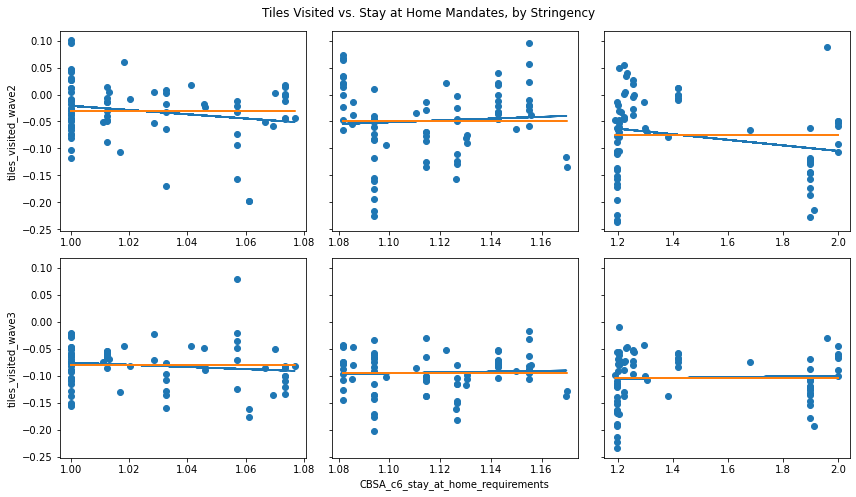

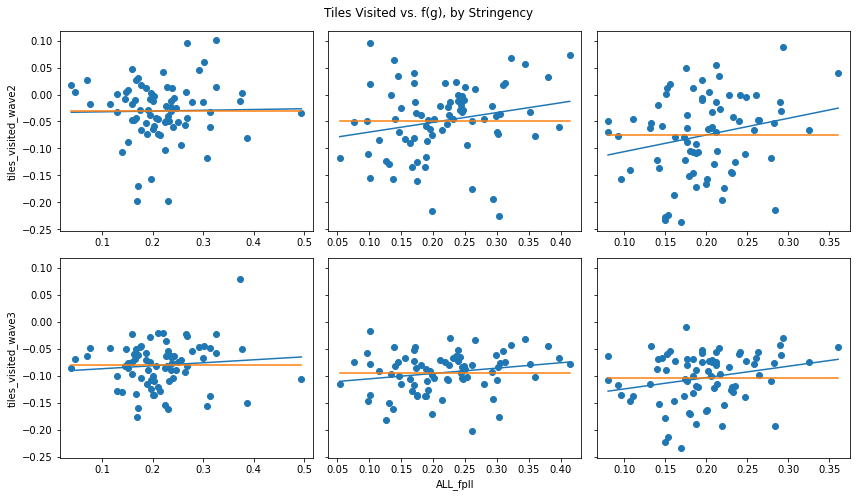

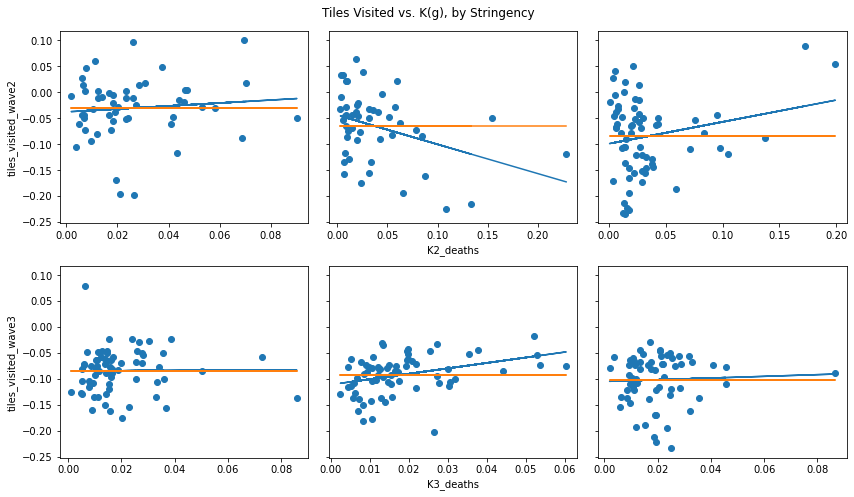

In [71]:
fig, axes = plt.subplots(2,3,figsize=(12,7), sharey=True)
dfs = [temp_df_b0, temp_df_b1, temp_df_b2]
for i in range(3):
    df = dfs[i]
    axes[0,i].scatter(df['CBSA_c6_stay_at_home_requirements'], df['tiles_visited_wave2'])
    m,b = np.polyfit(df['CBSA_c6_stay_at_home_requirements'], df['tiles_visited_wave2'], 1)
    axes[0,i].plot(df['CBSA_c6_stay_at_home_requirements'], df['CBSA_c6_stay_at_home_requirements']*m+b)
    mu = df['tiles_visited_wave2'].mean()
    axes[0,i].plot(df['CBSA_c6_stay_at_home_requirements'], [mu for i in range(len(df['CBSA_c6_stay_at_home_requirements']))])
    axes[1,i].scatter(df['CBSA_c6_stay_at_home_requirements'], df['tiles_visited_wave3'])
    m,b = np.polyfit(df['CBSA_c6_stay_at_home_requirements'], df['tiles_visited_wave3'], 1)
    axes[1,i].plot(df['CBSA_c6_stay_at_home_requirements'], df['CBSA_c6_stay_at_home_requirements']*m+b)
    mu = df['tiles_visited_wave3'].mean()
    axes[1,i].plot(df['CBSA_c6_stay_at_home_requirements'], [mu for i in range(len(df['CBSA_c6_stay_at_home_requirements']))])
axes[1,1].set_xlabel('CBSA_c6_stay_at_home_requirements')
axes[0,0].set_ylabel('tiles_visited_wave2')
axes[1,0].set_ylabel('tiles_visited_wave3')
plt.suptitle('Tiles Visited vs. Stay at Home Mandates, by Stringency')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2,3,figsize=(12,7), sharey=True)
dfs = [temp_df_b0, temp_df_b1, temp_df_b2]
for i in range(3):
    df = dfs[i]
    axes[0,i].scatter(df['ALL_fpll'], df['tiles_visited_wave2'])
    m,b = np.polyfit(df['ALL_fpll'], df['tiles_visited_wave2'], 1)
    axes[0,i].plot(df['ALL_fpll'], df['ALL_fpll']*m+b)
    mu = df['tiles_visited_wave2'].mean()
    axes[0,i].plot(df['ALL_fpll'], [mu for i in range(len(df['ALL_fpll']))])
    axes[1,i].scatter(df['ALL_fpll'], df['tiles_visited_wave3'])
    m,b = np.polyfit(df['ALL_fpll'], df['tiles_visited_wave3'], 1)
    axes[1,i].plot(df['ALL_fpll'], df['ALL_fpll']*m+b)
    mu = df['tiles_visited_wave3'].mean()
    axes[1,i].plot(df['ALL_fpll'], [mu for i in range(len(df['ALL_fpll']))])
axes[1,1].set_xlabel('ALL_fpll')
axes[0,0].set_ylabel('tiles_visited_wave2')
axes[1,0].set_ylabel('tiles_visited_wave3')
plt.suptitle('Tiles Visited vs. f(g), by Stringency')
plt.tight_layout()
plt.show()


fig, axes = plt.subplots(2,3,figsize=(12,7), sharey=True)
dfs = [temp_df_b0, temp_df_b1, temp_df_b2]
for i in range(3):
    df = dfs[i]
    tdf = df[df['K2_deaths']>0]
    axes[0,i].scatter(tdf['K2_deaths'], tdf['tiles_visited_wave2'])
    m,b = np.polyfit(tdf['K2_deaths'], tdf['tiles_visited_wave2'], 1)
    axes[0,i].plot(tdf['K2_deaths'], tdf['K2_deaths']*m+b)
    mu = tdf['tiles_visited_wave2'].mean()
    axes[0,i].plot(tdf['K2_deaths'], [mu for i in range(len(tdf['K3_deaths']))])
    tdf = df[df['K3_deaths']>0]
    axes[1,i].scatter(tdf['K3_deaths'], tdf['tiles_visited_wave3'])
    m,b = np.polyfit(tdf['K3_deaths'], tdf['tiles_visited_wave3'], 1)
    axes[1,i].plot(tdf['K3_deaths'], tdf['K3_deaths']*m+b)
    mu = tdf['tiles_visited_wave3'].mean()
    axes[1,i].plot(tdf['K3_deaths'], [mu for i in range(len(tdf['K3_deaths']))])
axes[0,1].set_xlabel('K2_deaths')
axes[1,1].set_xlabel('K3_deaths')
axes[0,0].set_ylabel('tiles_visited_wave2')
axes[1,0].set_ylabel('tiles_visited_wave3')
plt.suptitle('Tiles Visited vs. K(g), by Stringency')
plt.tight_layout()
plt.show()

## TODO:
1. Look at existing papers on mobility patterns & seasonality. Look for other quantities we could use to measure here. 
2. Write more!!!! better define the narrative and new results and organize appropriate sections 
    2a. Also do binned scatter plots
3. Do correlation, regressions, and mutual information among these variables
3. Read the paper dr. lopez sent


https://link.springer.com/article/10.1007/s10940-011-9145-7

https://journals.sagepub.com/doi/abs/10.1177/004728759403200309

The Decline in Human Seasonality
https://journals.sagepub.com/doi/10.1177/0748730404264863

Human Birth Seasonality
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3743217/


In [ ]:
axes[1,b] = binplot_dim(axes[1,b], tdf['beds_per_capita'], tdf['K3_ratio'], plotbins, c='darkslategrey',s=30, label='')